In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *
from initialize import *

In [2]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [3]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10.024

In [4]:
#binning in l
binl=10**np.linspace(np.log10(50), np.log10(8500), 20)

In [5]:
#try a flat distribution
dndz_f = np.zeros([400,2])
dndz_f[:, 0] = np.linspace(0.001, 4, 400)
dndz_f[:, 1] = np.ones(400)

In [6]:
cl_f = {} 
cov_f = {}
redshifts_f = {}
sliced_dndz_f = {}

for n in range(1,5):
    for btype in ["z", "n"]:
        cov_f["{0}_{1}".format(btype, n)], cl_f["{0}_{1}".format(btype, n)], redshifts_f["{0}_{1}".format(btype, n)], sliced_dndz_f["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz_f, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4)

In [7]:
stn_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        stn_f["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl_f["{0}_{1}".format(i, j)], cov = cov_f["{0}_{1}".format(i, j)], ell=ell)

In [8]:
fisher_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        global dndz_sliced
        dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)]
        fisher_f["{0}_{1}".format(i,j)] = fisher_matrix(covariance = cov_f["{0}_{1}".format(i, j)], dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)])

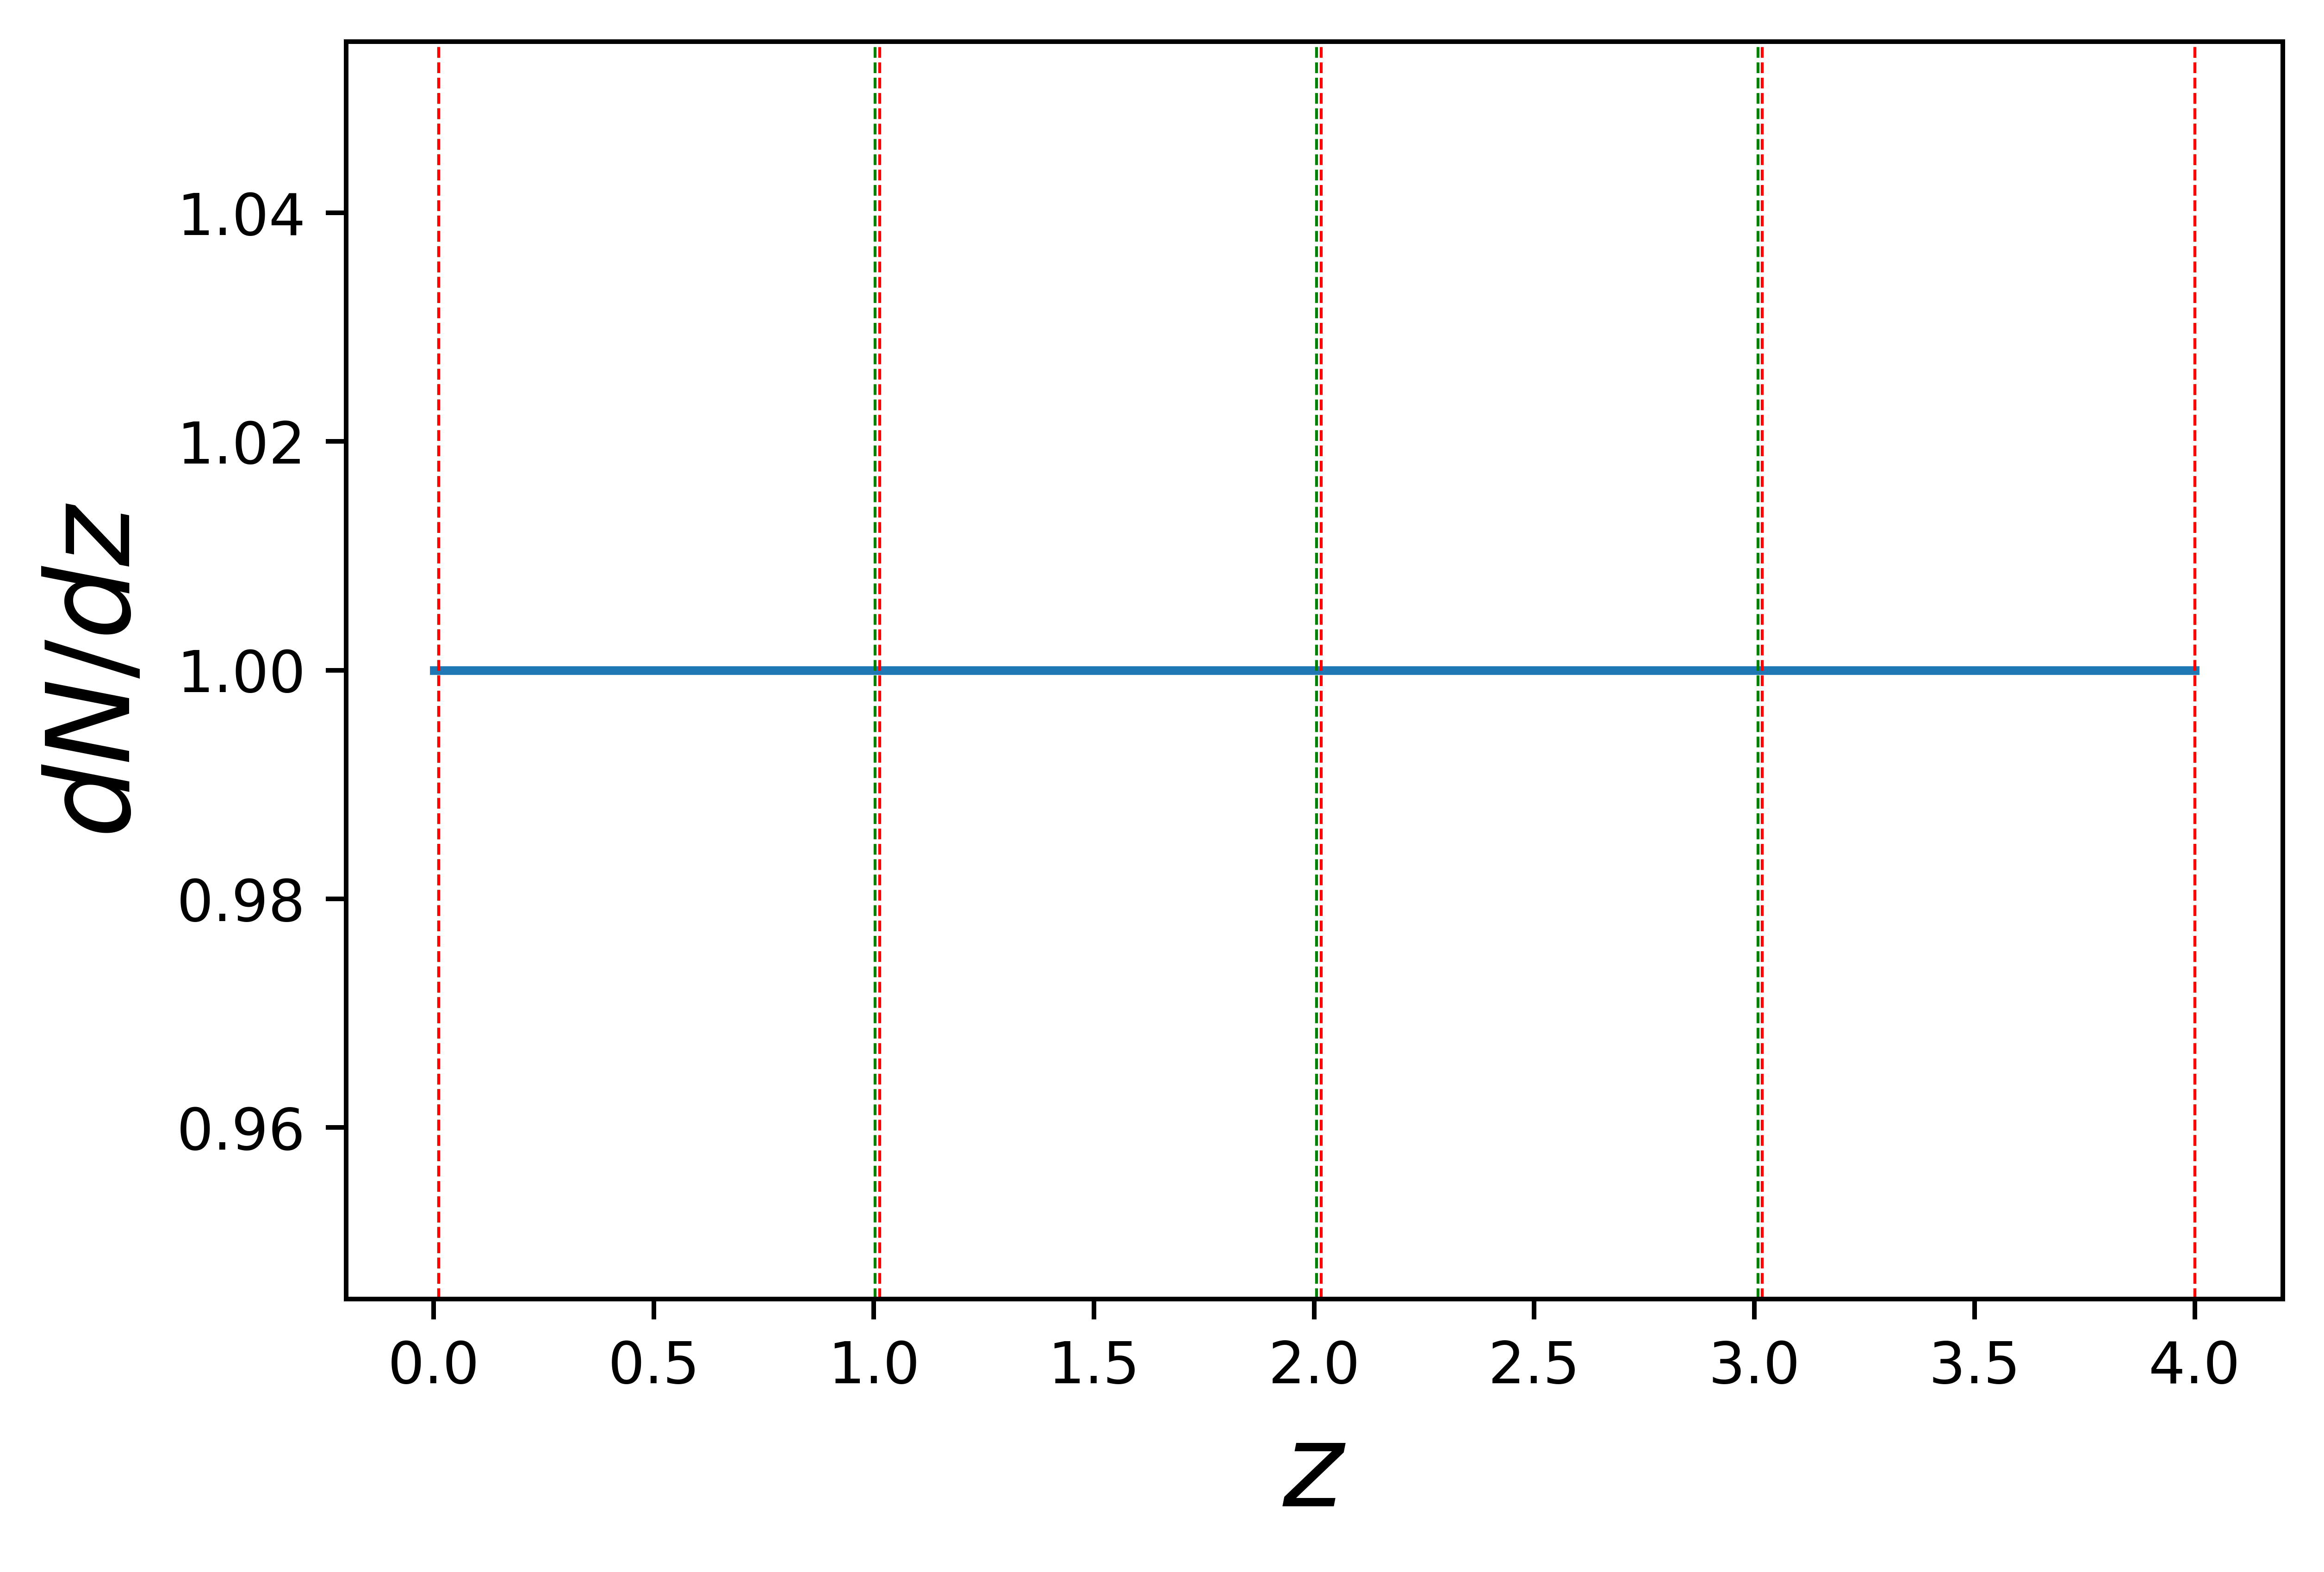

In [9]:
plt.plot(dndz_f[:,0], dndz_f[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_f["n_4"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
for x in redshifts_f["z_4"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.show()

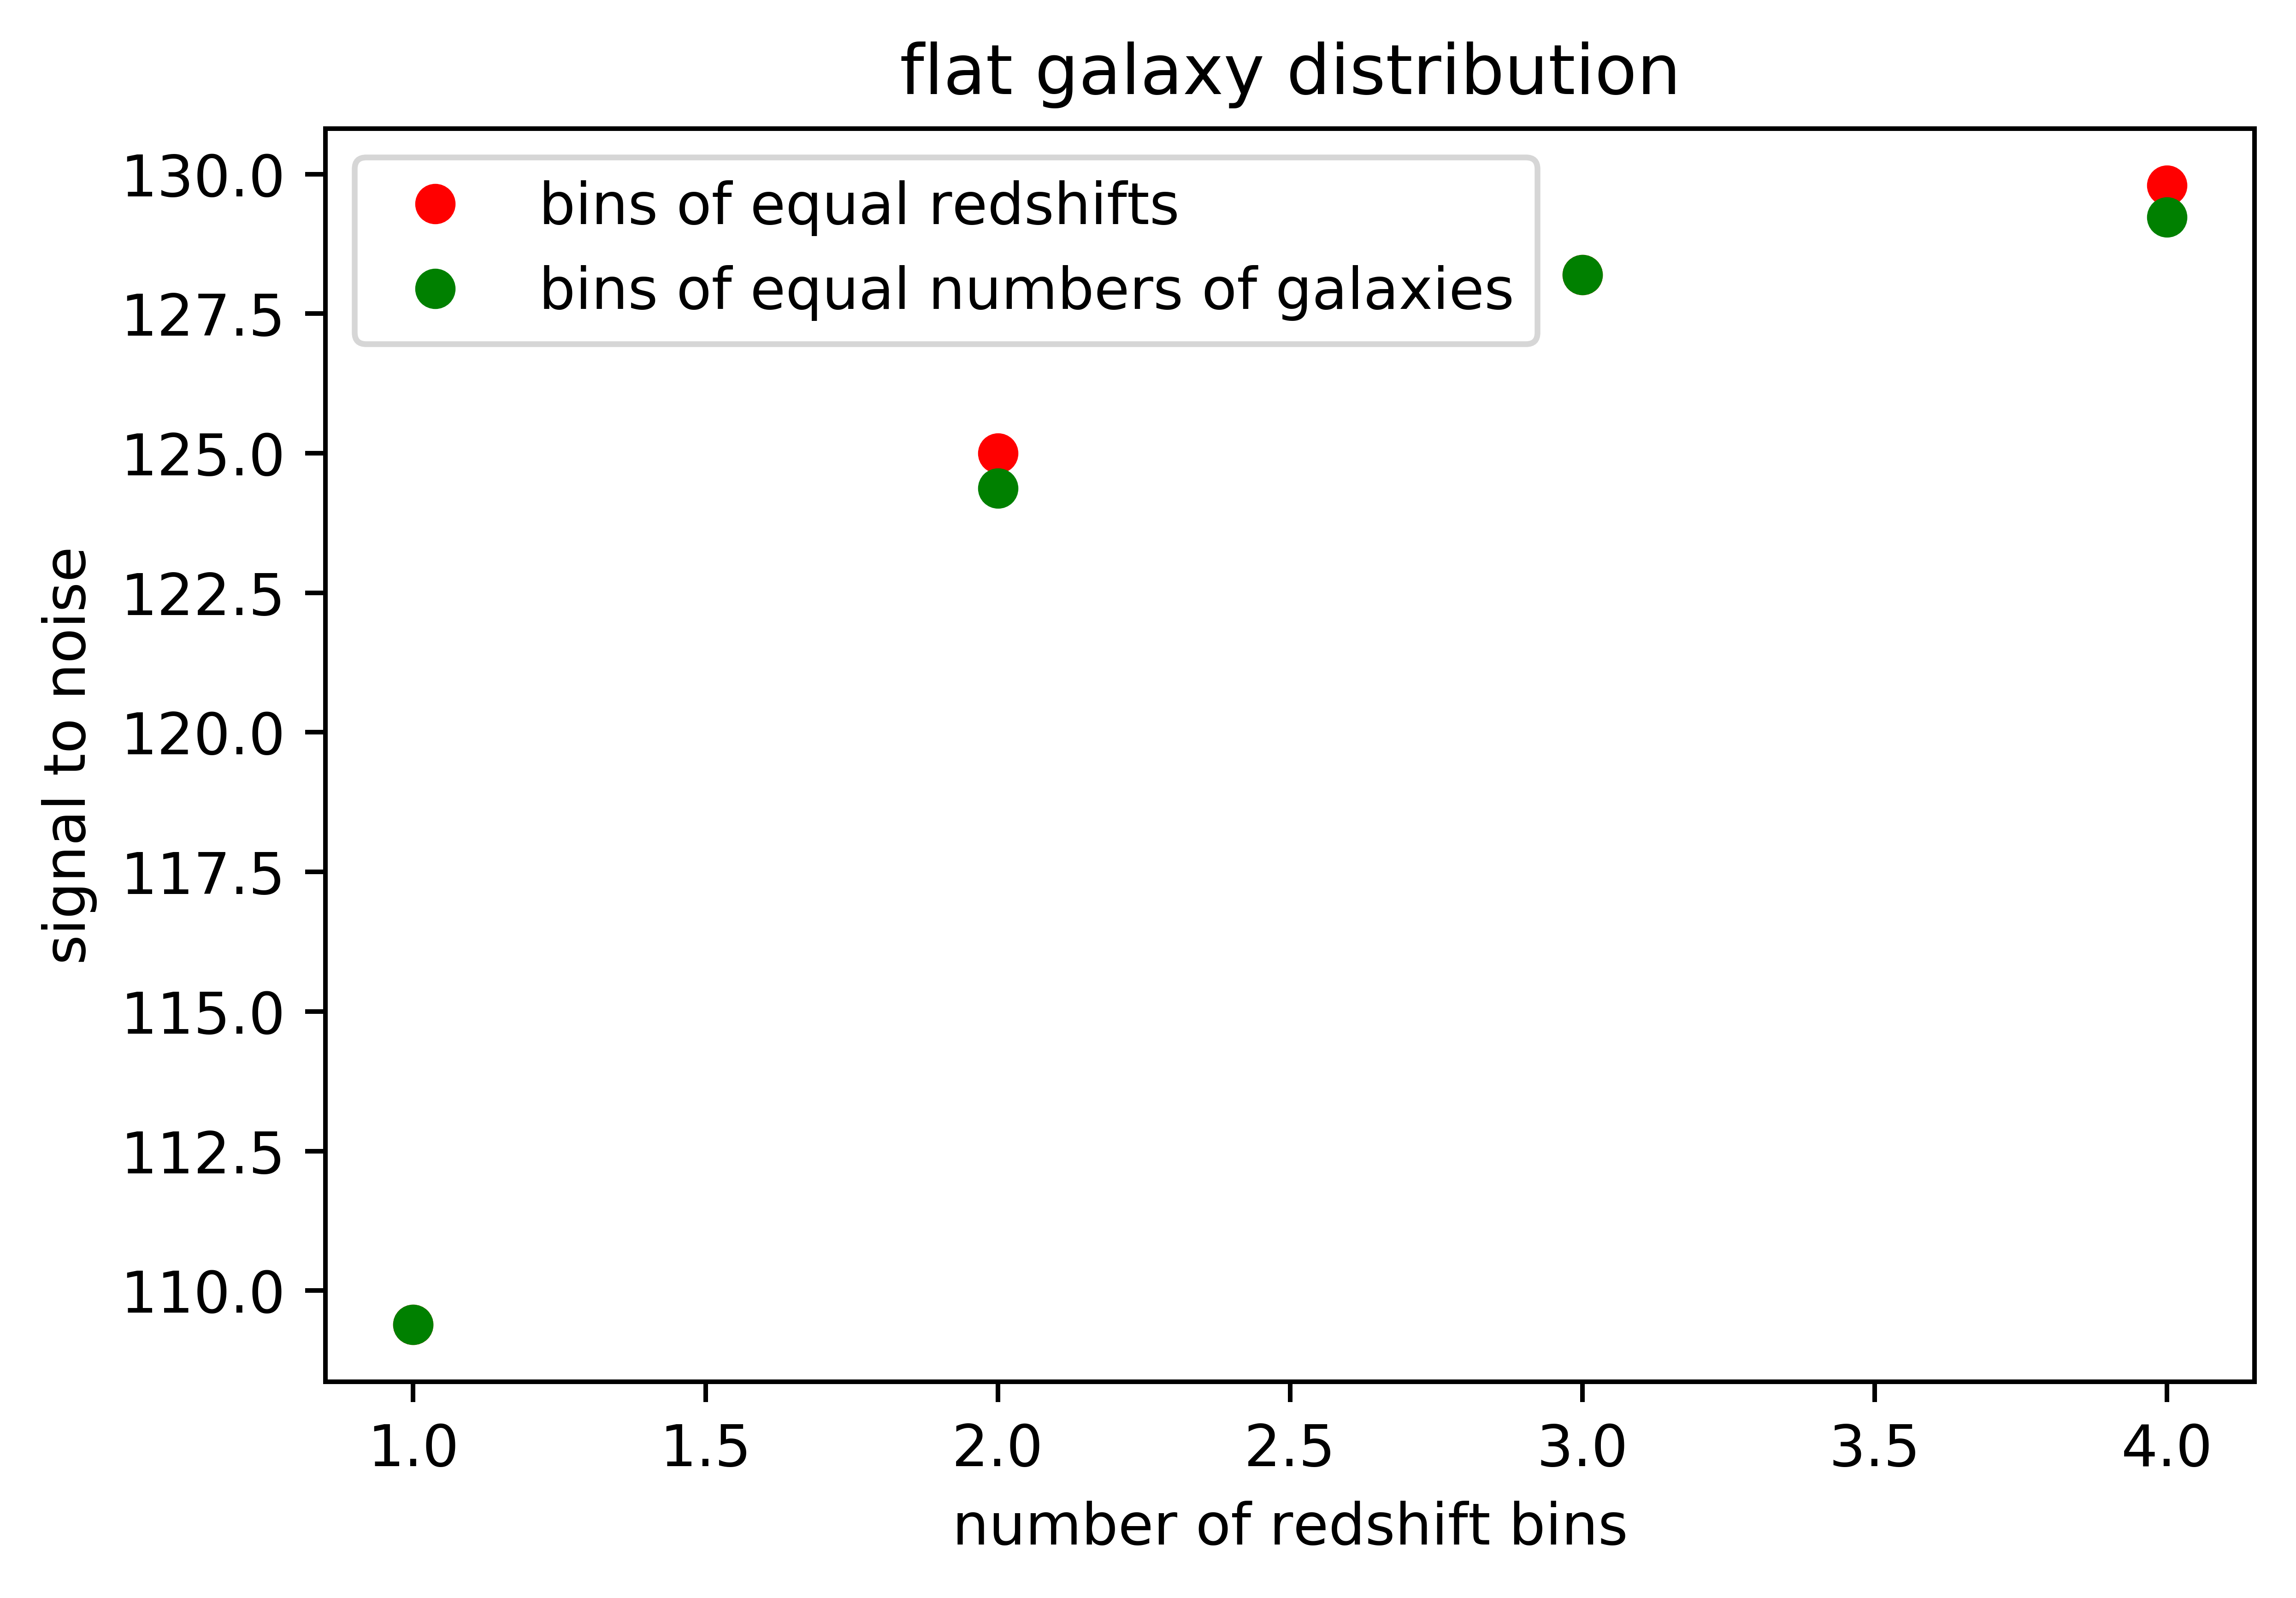

In [10]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_f["z_1"], stn_f["z_2"], stn_f["z_3"], stn_f["z_4"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [stn_f["n_1"], stn_f["n_2"], stn_f["n_3"], stn_f["n_4"]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("signal to noise")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

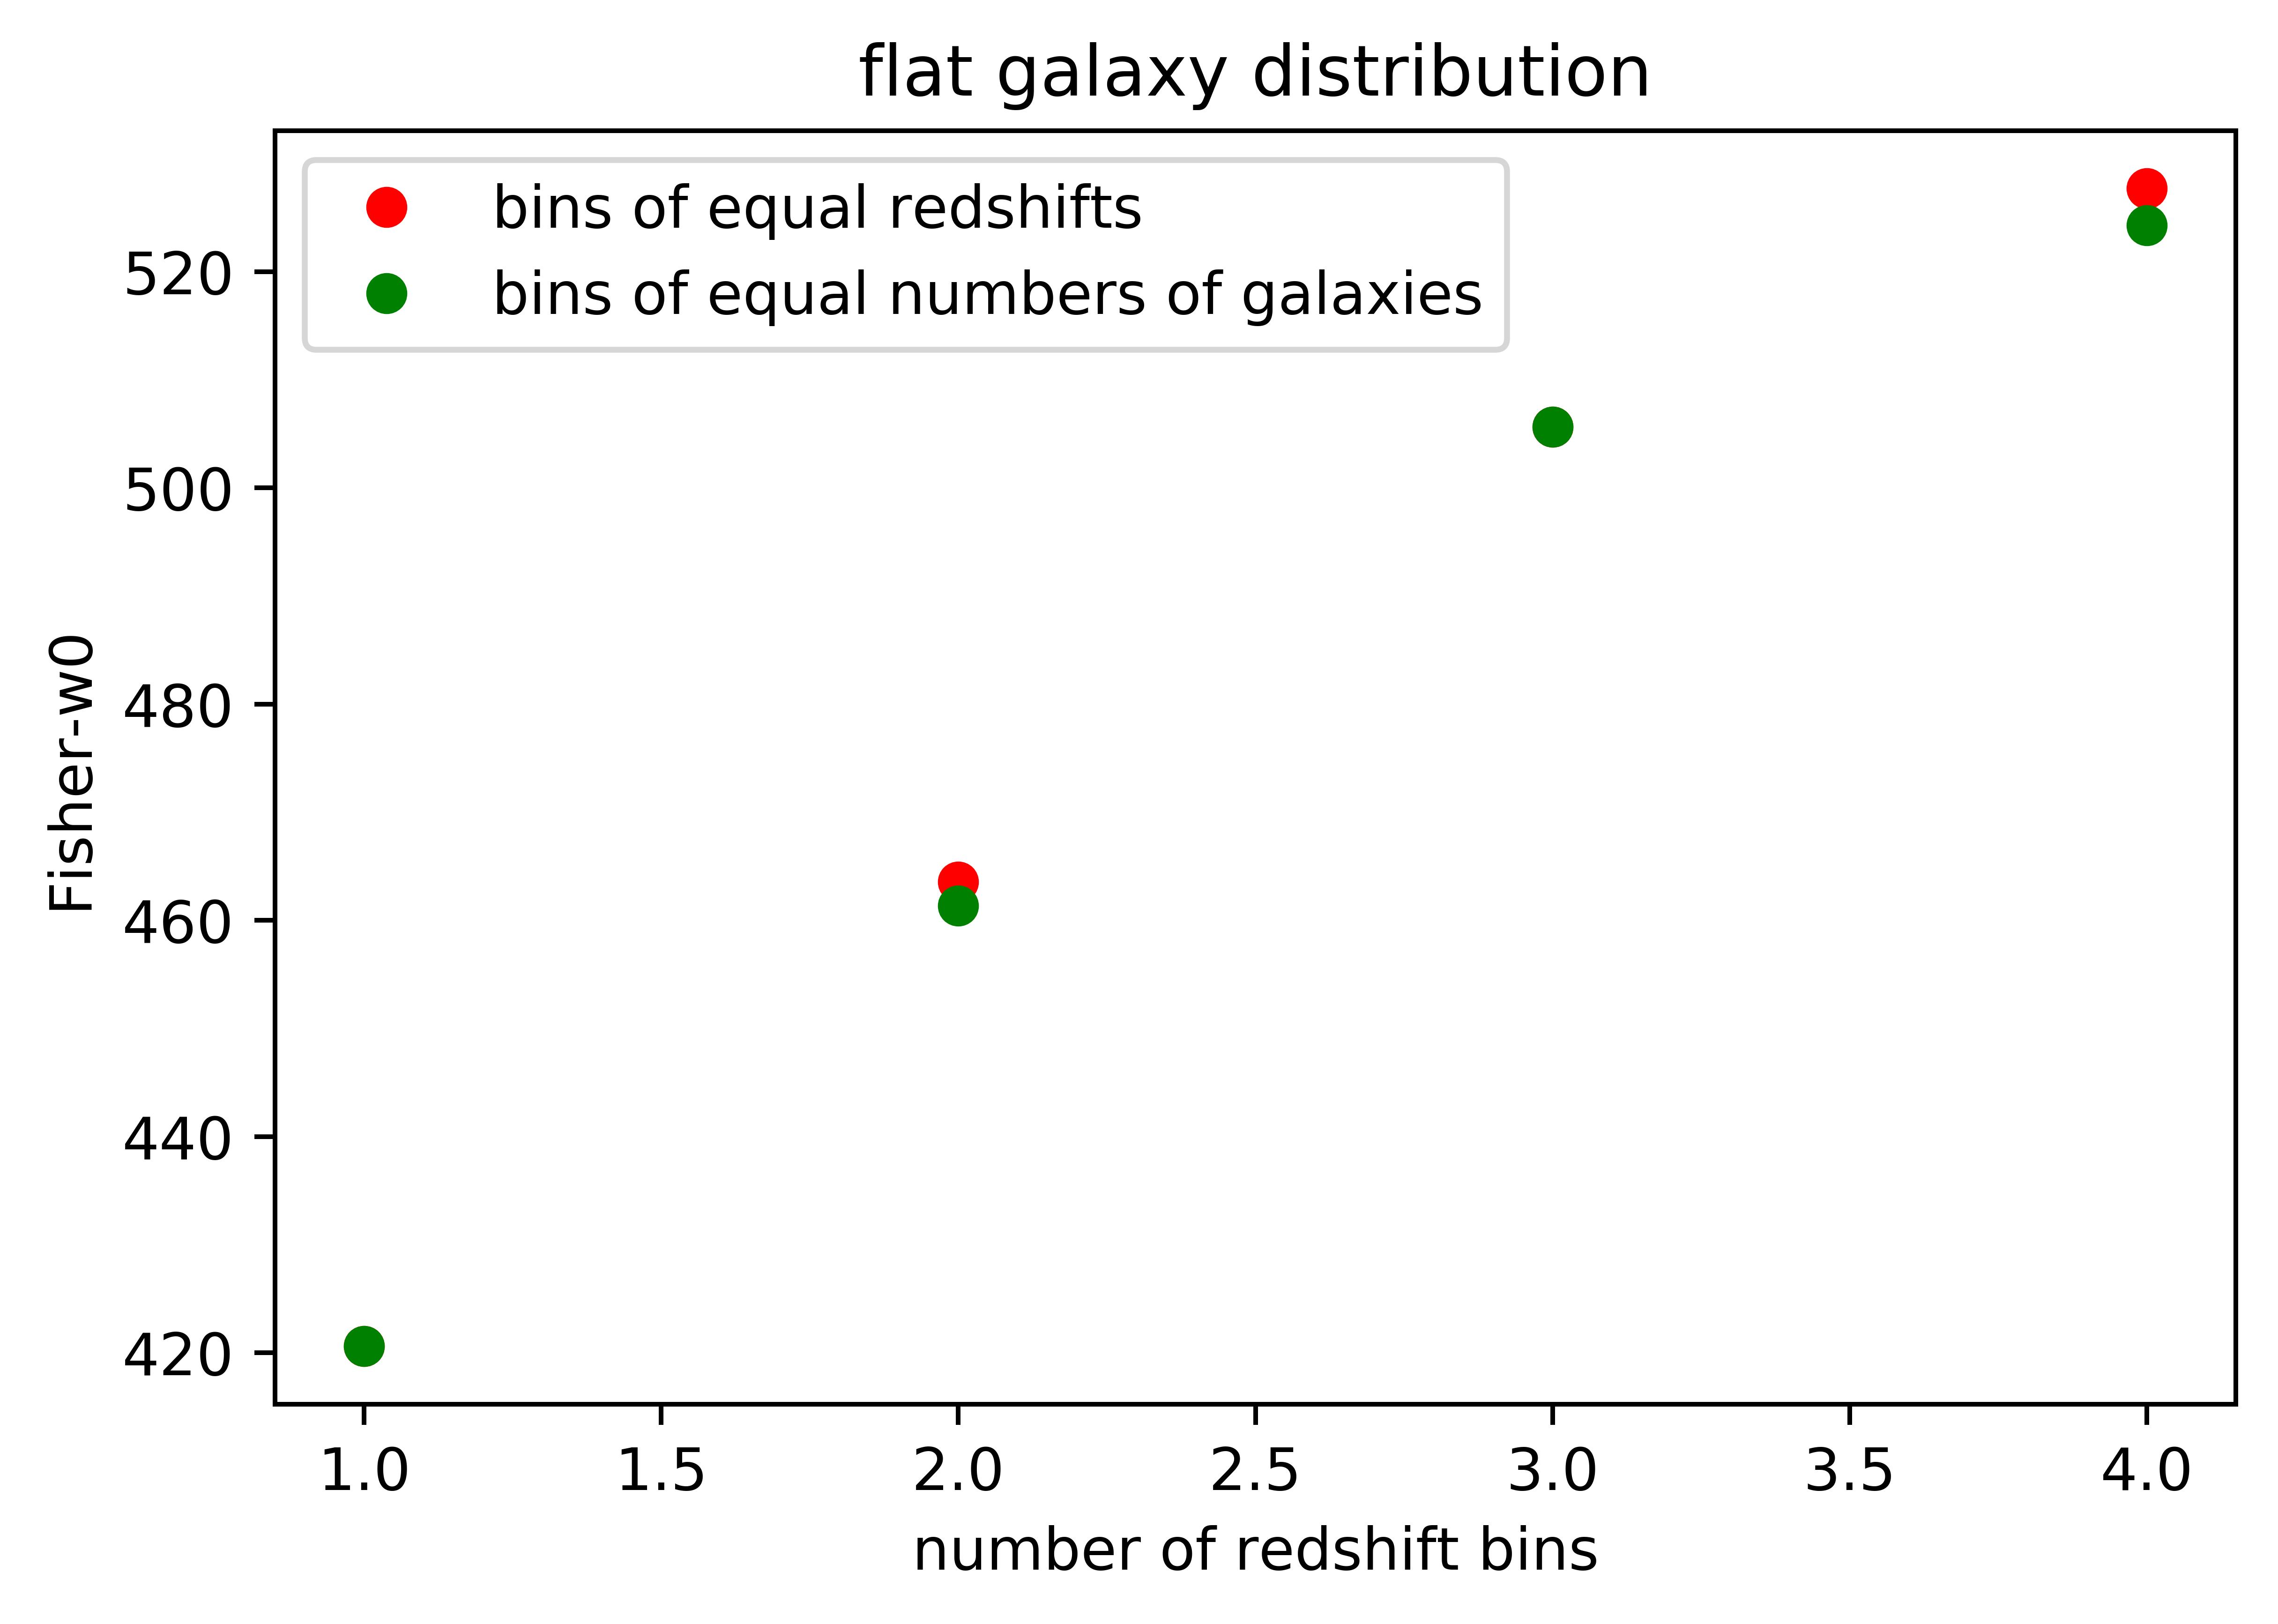

In [11]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_f["z_1"][3,3], fisher_f["z_2"][3,3], fisher_f["z_3"][3,3], fisher_f["z_4"][3,3]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [fisher_f["n_1"][3,3], fisher_f["n_2"][3,3], fisher_f["n_3"][3,3], fisher_f["n_4"][3,3]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("Fisher-w0")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

In [12]:
fisher_f["n_4"]

array([[ 2.01417395e+05,  1.77560629e+05,  7.56796619e+03,
        -8.68410372e+03, -2.78868930e+04, -3.85520056e+04,
         1.13643066e+04],
       [ 1.77560629e+05,  1.67723611e+05, -1.09360721e+03,
        -8.12582619e+03, -2.79688777e+04, -1.37376761e+04,
         4.05195751e+03],
       [ 7.56796619e+03, -1.09360721e+03,  9.96932530e+03,
         7.01161677e+02,  1.63661533e+03, -2.16479737e+04,
         6.36459727e+03],
       [-8.68410372e+03, -8.12582619e+03,  7.01161677e+02,
         5.24260529e+02,  1.38768054e+03, -3.46628963e+02,
         9.97294836e+01],
       [-2.78868930e+04, -2.79688777e+04,  1.63661533e+03,
         1.38768054e+03,  5.07479960e+03, -8.96492458e+02,
         2.60105167e+02],
       [-3.85520056e+04, -1.37376761e+04, -2.16479737e+04,
        -3.46628963e+02, -8.96492458e+02,  5.60691578e+04,
        -1.65077606e+04],
       [ 1.13643066e+04,  4.05195751e+03,  6.36459727e+03,
         9.97294836e+01,  2.60105167e+02, -1.65077606e+04,
         4.8602975

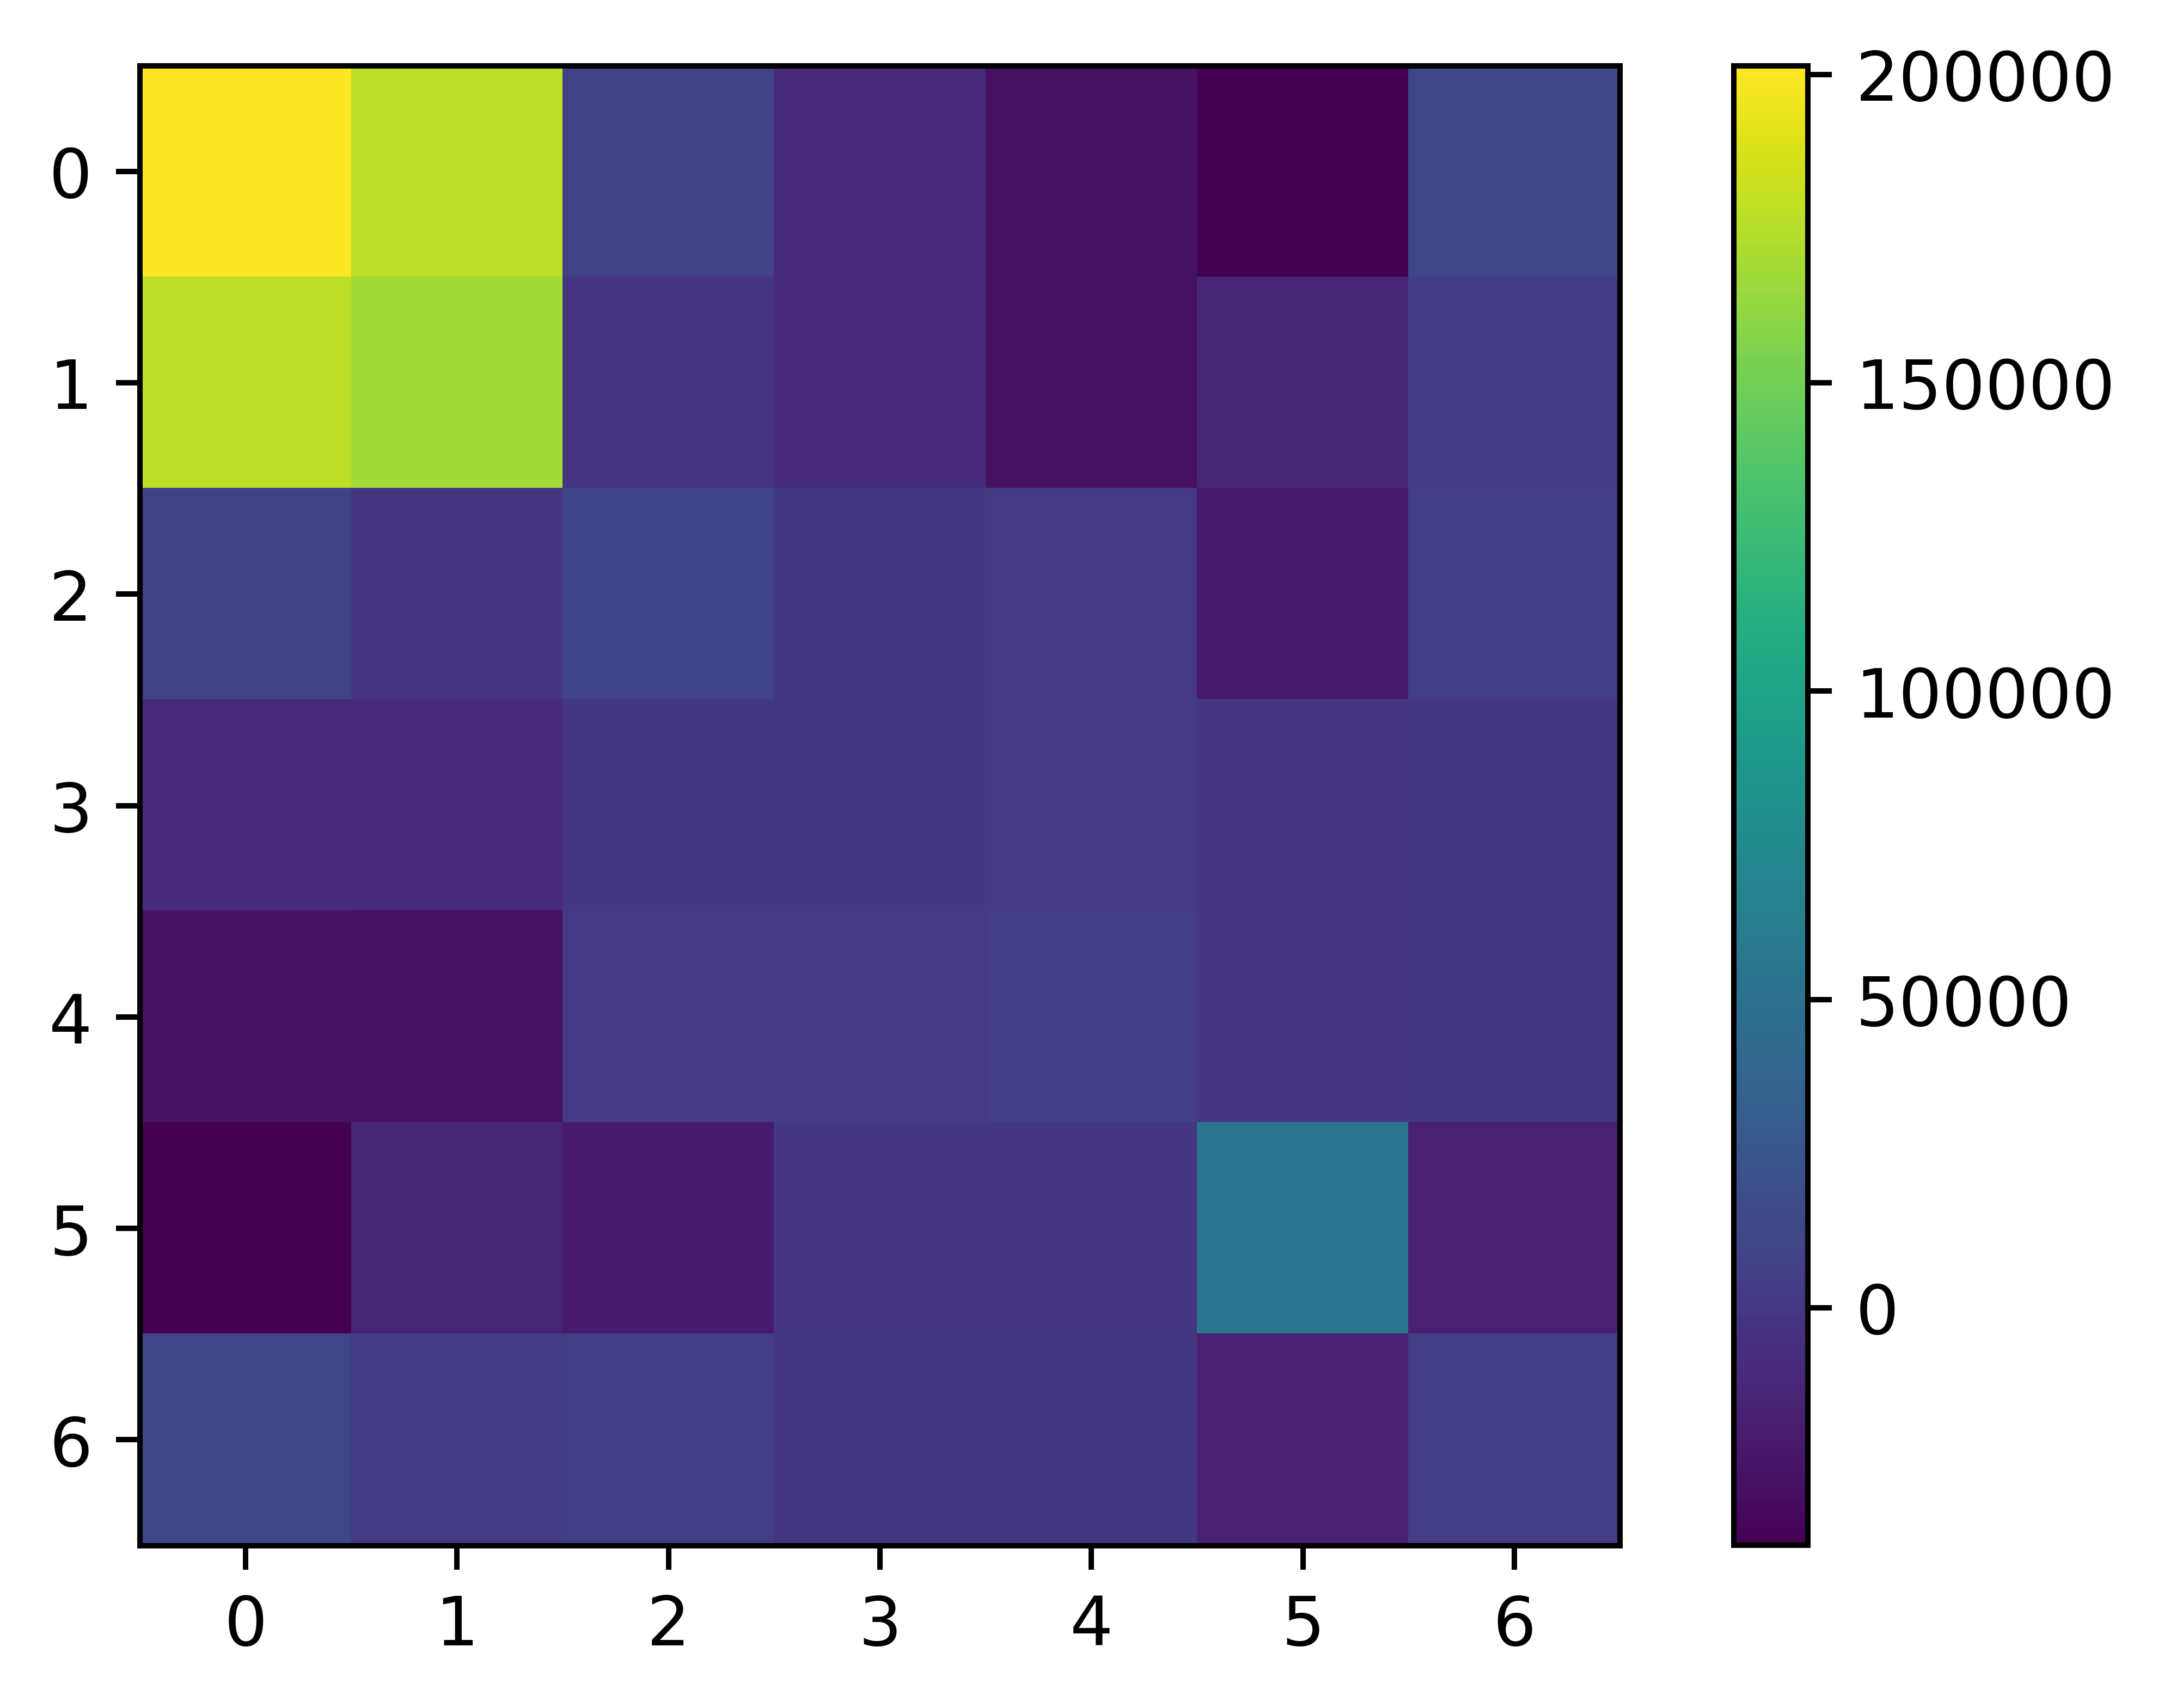

In [13]:
plt.imshow(fisher_f["n_4"])
plt.colorbar()

In [14]:
#we want to know the correlation matrix of cosmological parameters
def corr_p(fisher):
    dim = fisher.shape
    cov = np.linalg.inv(fisher)
    correlation = np.zeros(dim)
    for j in range(dim[0]):
        for k in range(dim[1]):
            correlation[j, k] = cov[j,k]/np.sqrt(cov[j,j]*cov[k,k])
    return correlation

([<matplotlib.axis.YTick at 0x7f1a4829a210>,
 <a list of 4 Text yticklabel objects>)

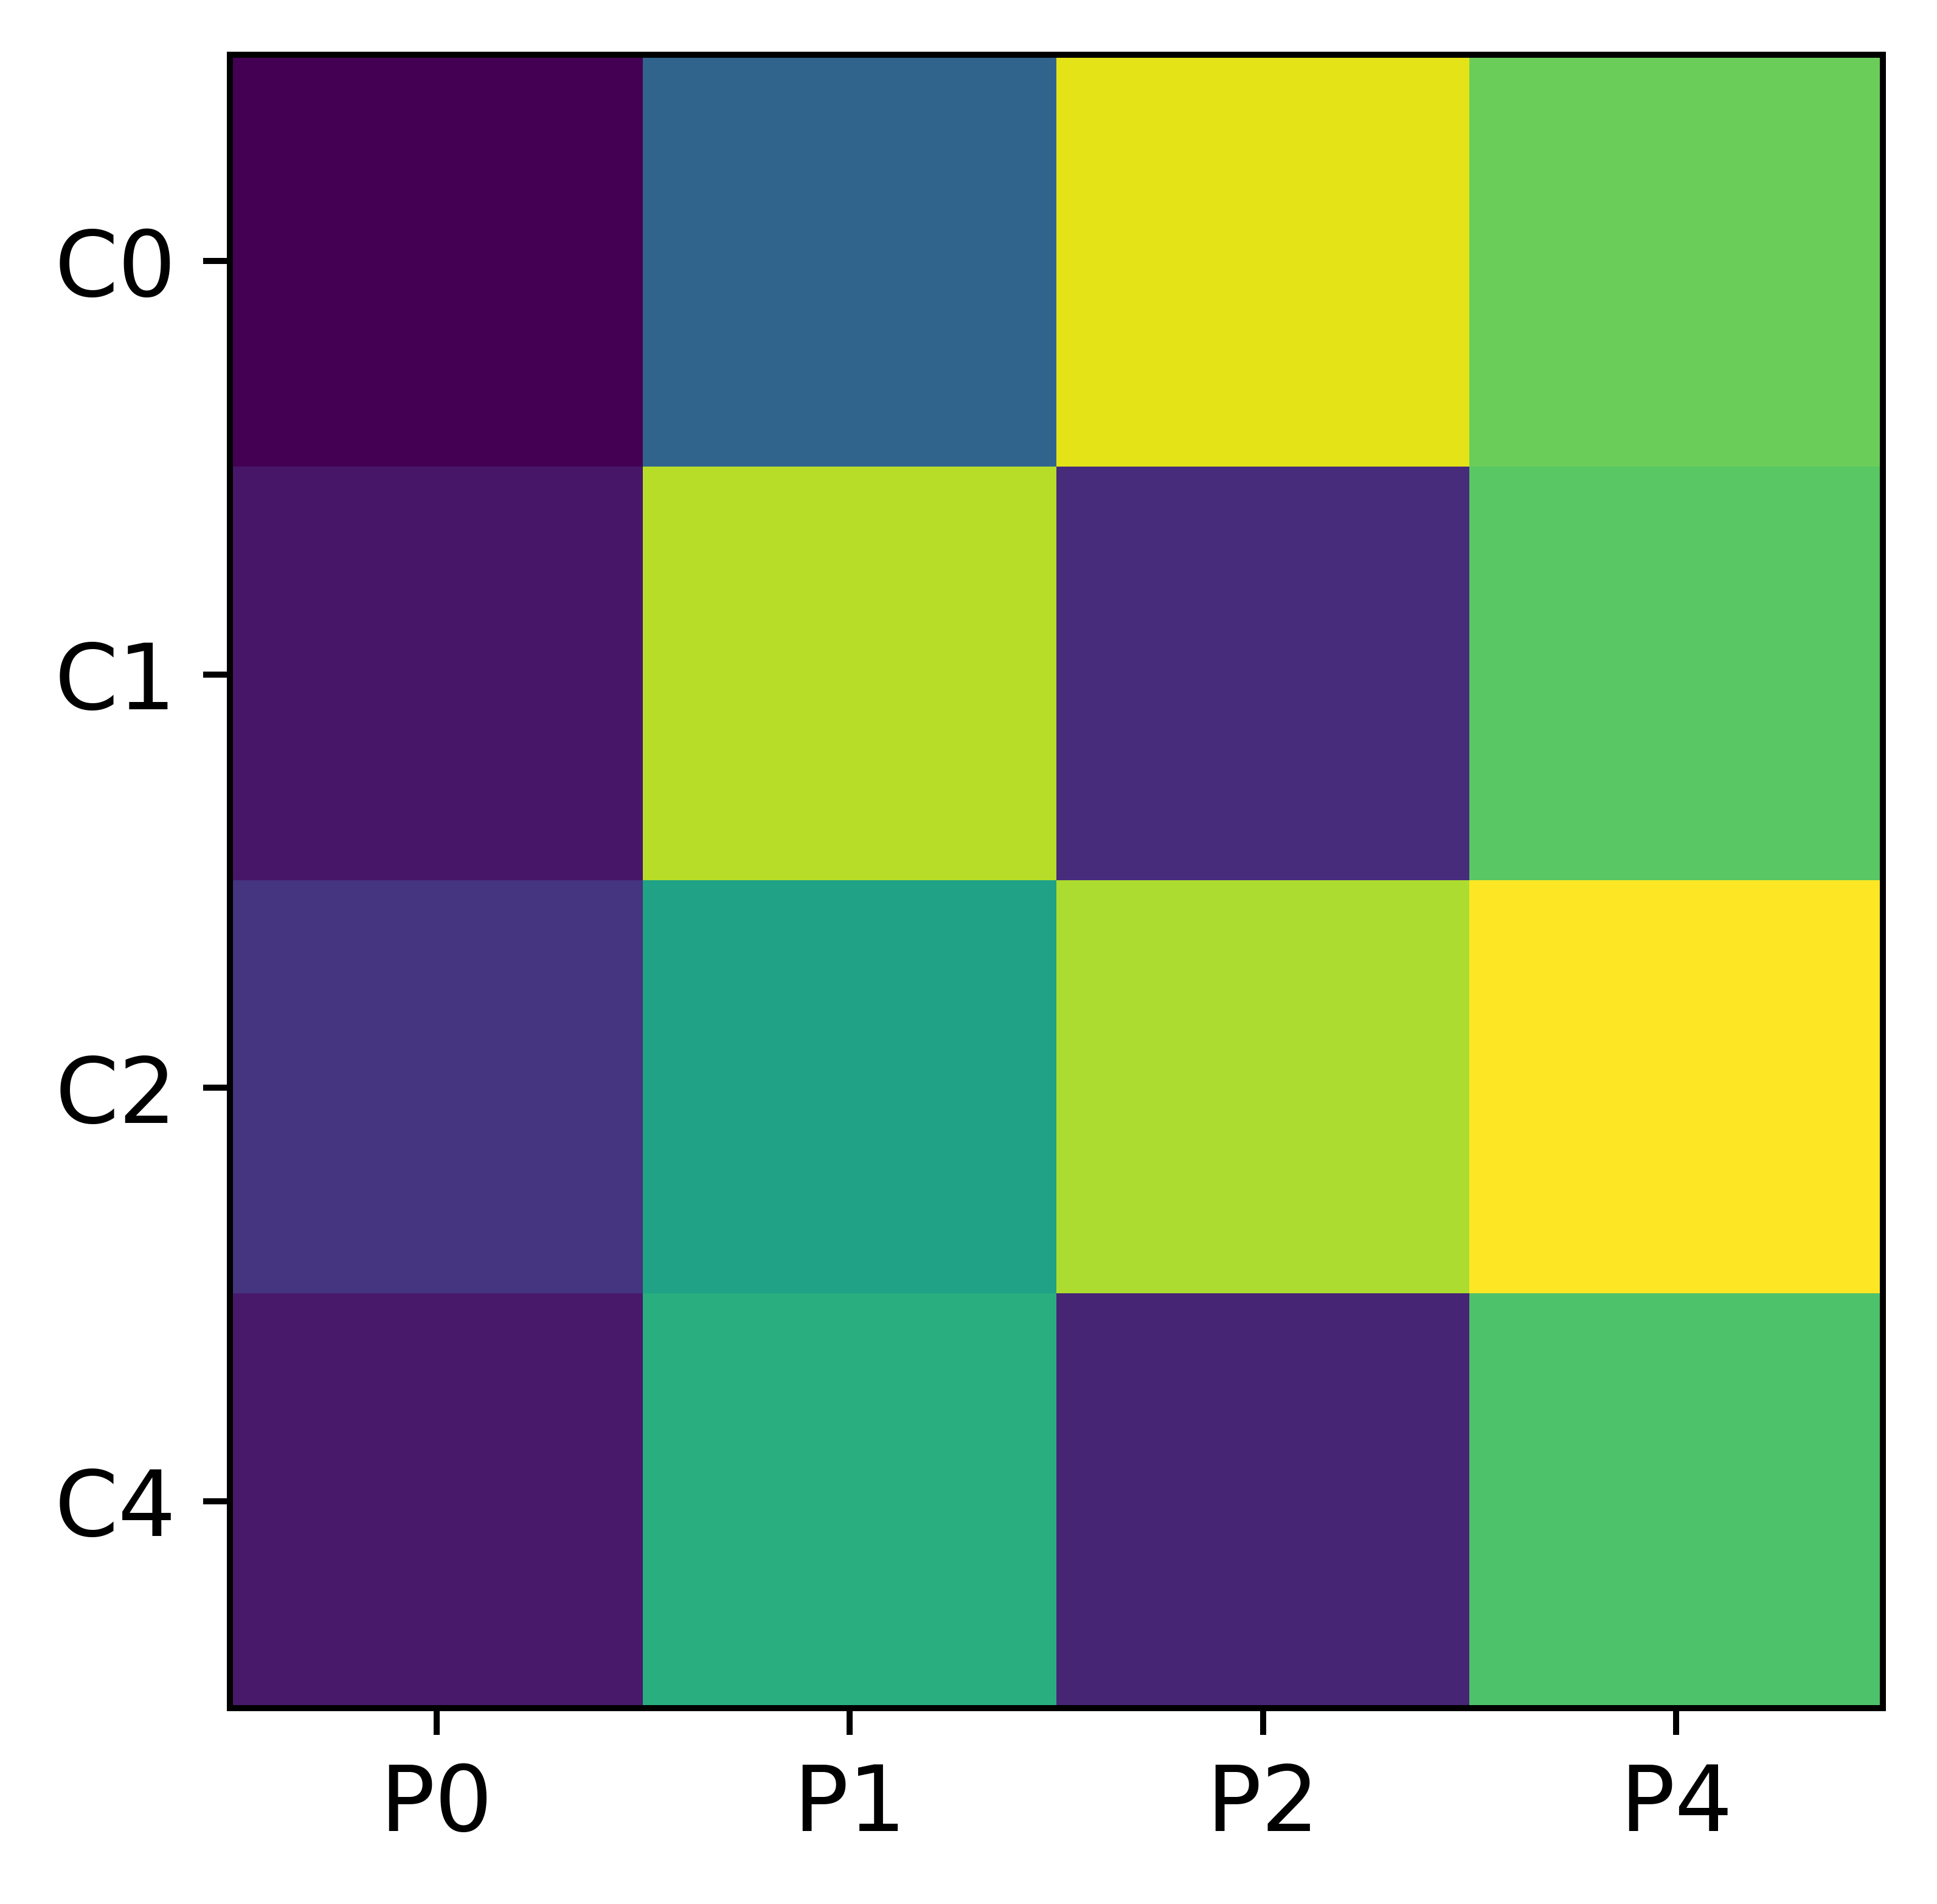

In [15]:
grid = np.random.rand(4, 4)
x = ['P0', 'P1', 'P2', 'P4']
y = ['C0', 'C1', 'C2', 'C4']
plt.imshow(grid, interpolation='none')
plt.xticks(range(len(x)), x, fontsize=12)
plt.yticks(range(len(y)), y, fontsize=12)

In [31]:
order_p = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$\omega_0$', r'$\omega_a$', r'$\Omega_b$', r'$H$']

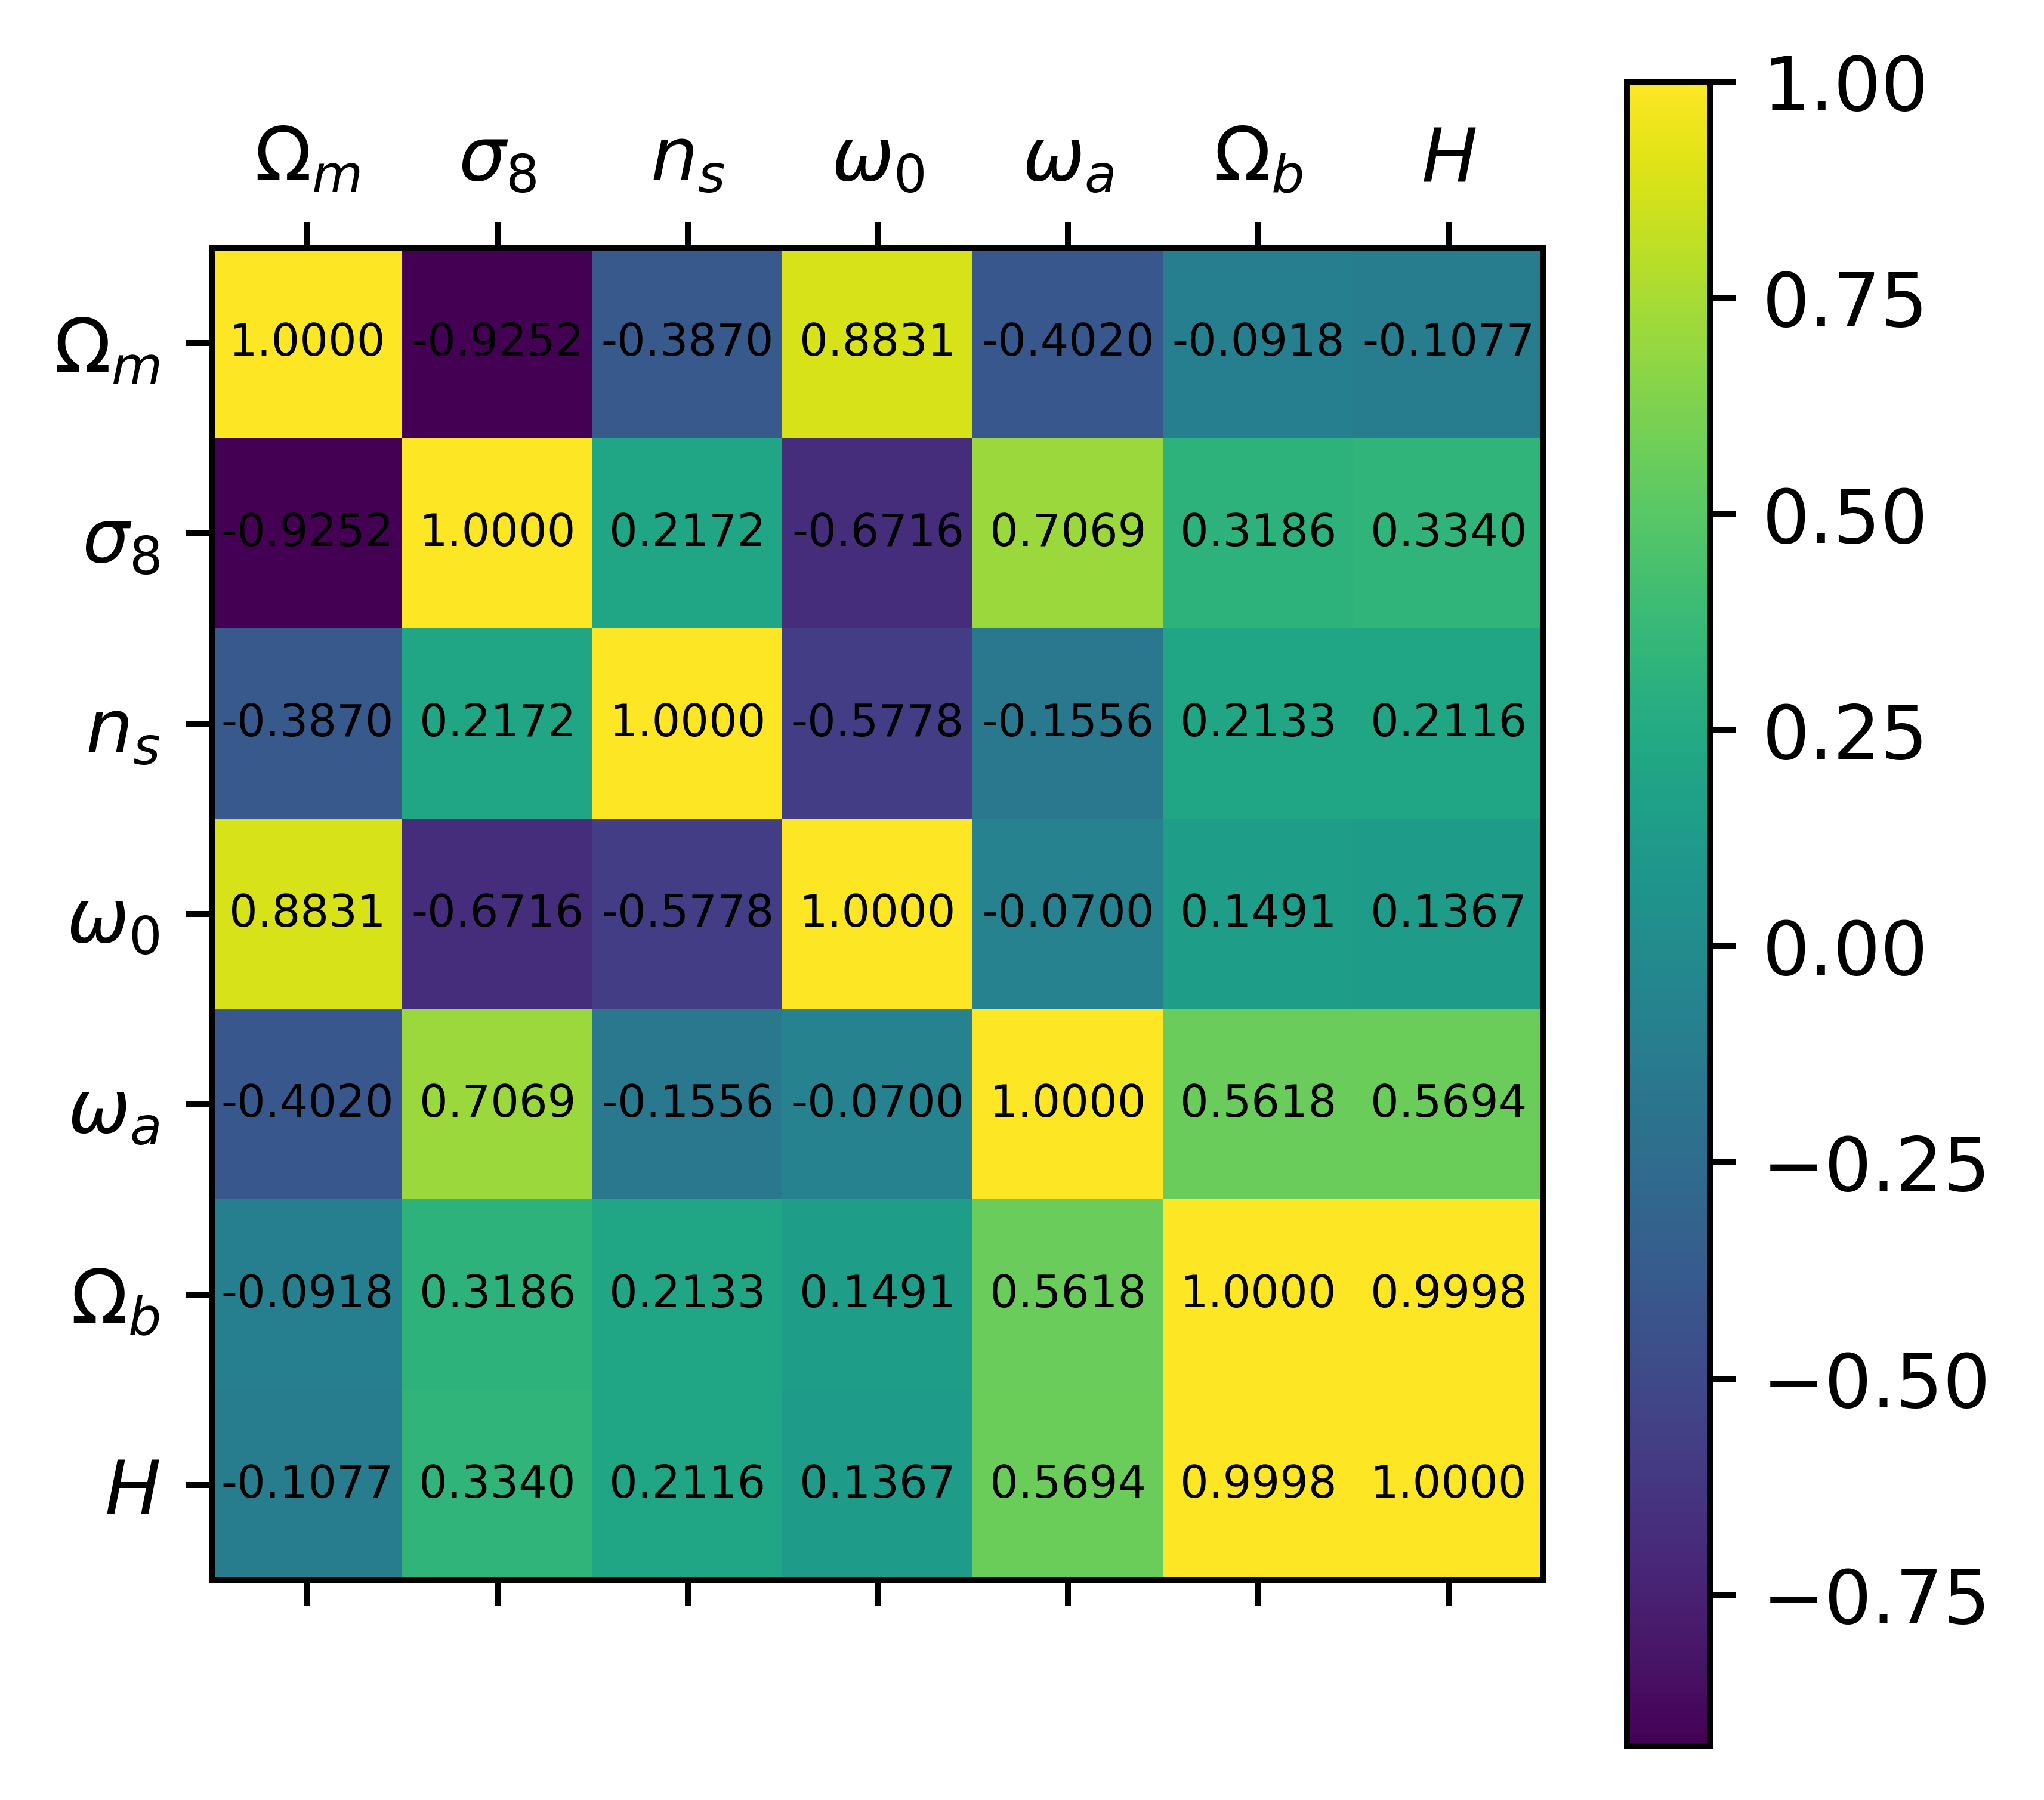

In [90]:
correlation_parameters = {}
correlation_parameters["n_4"] = corr_p(fisher_f["n_4"])


plt.matshow(correlation_parameters["n_4"])
plt.colorbar()
plt.xticks(np.arange(7), order_p)
plt.yticks(np.arange(7), order_p)
for i in range(7):
    for j in range(7):
        c = correlation_parameters["n_4"][j,i]
        plt.text(i, j, "%.4f"%(c), va='center', ha='center', fontsize=6)

In [18]:
correlation_parameters["n_4"] 

array([[ 1.        , -0.92523353, -0.38702473,  0.88306839, -0.40204052,
        -0.09175098, -0.10774762],
       [-0.92523353,  1.        ,  0.21720545, -0.67164633,  0.70687043,
         0.31855197,  0.33397315],
       [-0.38702473,  0.21720545,  1.        , -0.57780714, -0.15557078,
         0.21325429,  0.21161335],
       [ 0.88306839, -0.67164633, -0.57780714,  1.        , -0.0699851 ,
         0.14912285,  0.13673571],
       [-0.40204052,  0.70687043, -0.15557078, -0.0699851 ,  1.        ,
         0.56182572,  0.56942428],
       [-0.09175098,  0.31855197,  0.21325429,  0.14912285,  0.56182572,
         1.        ,  0.9998271 ],
       [-0.10774762,  0.33397315,  0.21161335,  0.13673571,  0.56942428,
         0.9998271 ,  1.        ]])

In [19]:
np.linalg.inv(fisher_f["n_4"])

array([[ 3.88502034e-03, -3.52465829e-03, -1.15916888e-03,
         1.95095276e-02, -2.80943215e-03, -8.46203585e-03,
        -3.36183824e-02],
       [-3.52465829e-03,  3.73540773e-03,  6.37897742e-04,
        -1.45500812e-02,  4.84351768e-03,  2.88082465e-02,
         1.02176975e-01],
       [-1.15916888e-03,  6.37897742e-04,  2.30899339e-03,
        -9.84124443e-03, -8.38091506e-04,  1.51627033e-02,
         5.09010671e-02],
       [ 1.95095276e-02, -1.45500812e-02, -9.84124443e-03,
         1.25635257e-01, -2.78107954e-03,  7.82109358e-02,
         2.42610835e-01],
       [-2.80943215e-03,  4.84351768e-03, -8.38091506e-04,
        -2.78107954e-03,  1.25690988e-02,  9.32011361e-02,
         3.19565977e-01],
       [-8.46203585e-03,  2.88082465e-02,  1.51627033e-02,
         7.82109358e-02,  9.32011361e-02,  2.18945005e+00,
         7.40567949e+00],
       [-3.36183824e-02,  1.02176975e-01,  5.09010671e-02,
         2.42610835e-01,  3.19565977e-01,  7.40567949e+00,
         2.5057917

In [20]:
#what if we just try 'omega_m' and 'w_0', would it give the same covariance value?
fisher_n_4_03 = np.zeros([2,2])
fisher_n_4_03[0,0] = fisher_f["n_4"][0,0]
fisher_n_4_03[0,1] = fisher_f["n_4"][0,3]
fisher_n_4_03[1,0] = fisher_f["n_4"][3,0]
fisher_n_4_03[1,1] = fisher_f["n_4"][3,3]
np.linalg.inv(fisher_n_4_03)

array([[1.73702421e-05, 2.87729050e-04],
       [2.87729050e-04, 6.67353105e-03]])

In [21]:
corr_p(fisher_n_4_03)

array([[1.        , 0.84508994],
       [0.84508994, 1.        ]])

choosing two parameter along would give difference values for correlation matrices and covariance matrices

In [50]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(fisher, mu_x, mu_y, ax, n_std, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    fisher: 2*2 fisher matrix
        Input data.
        
    mu_x: mean value of parameter x
    mu_y: mean value of parameter y

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """

    cov = np.linalg.inv(fisher)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mu_x, mu_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

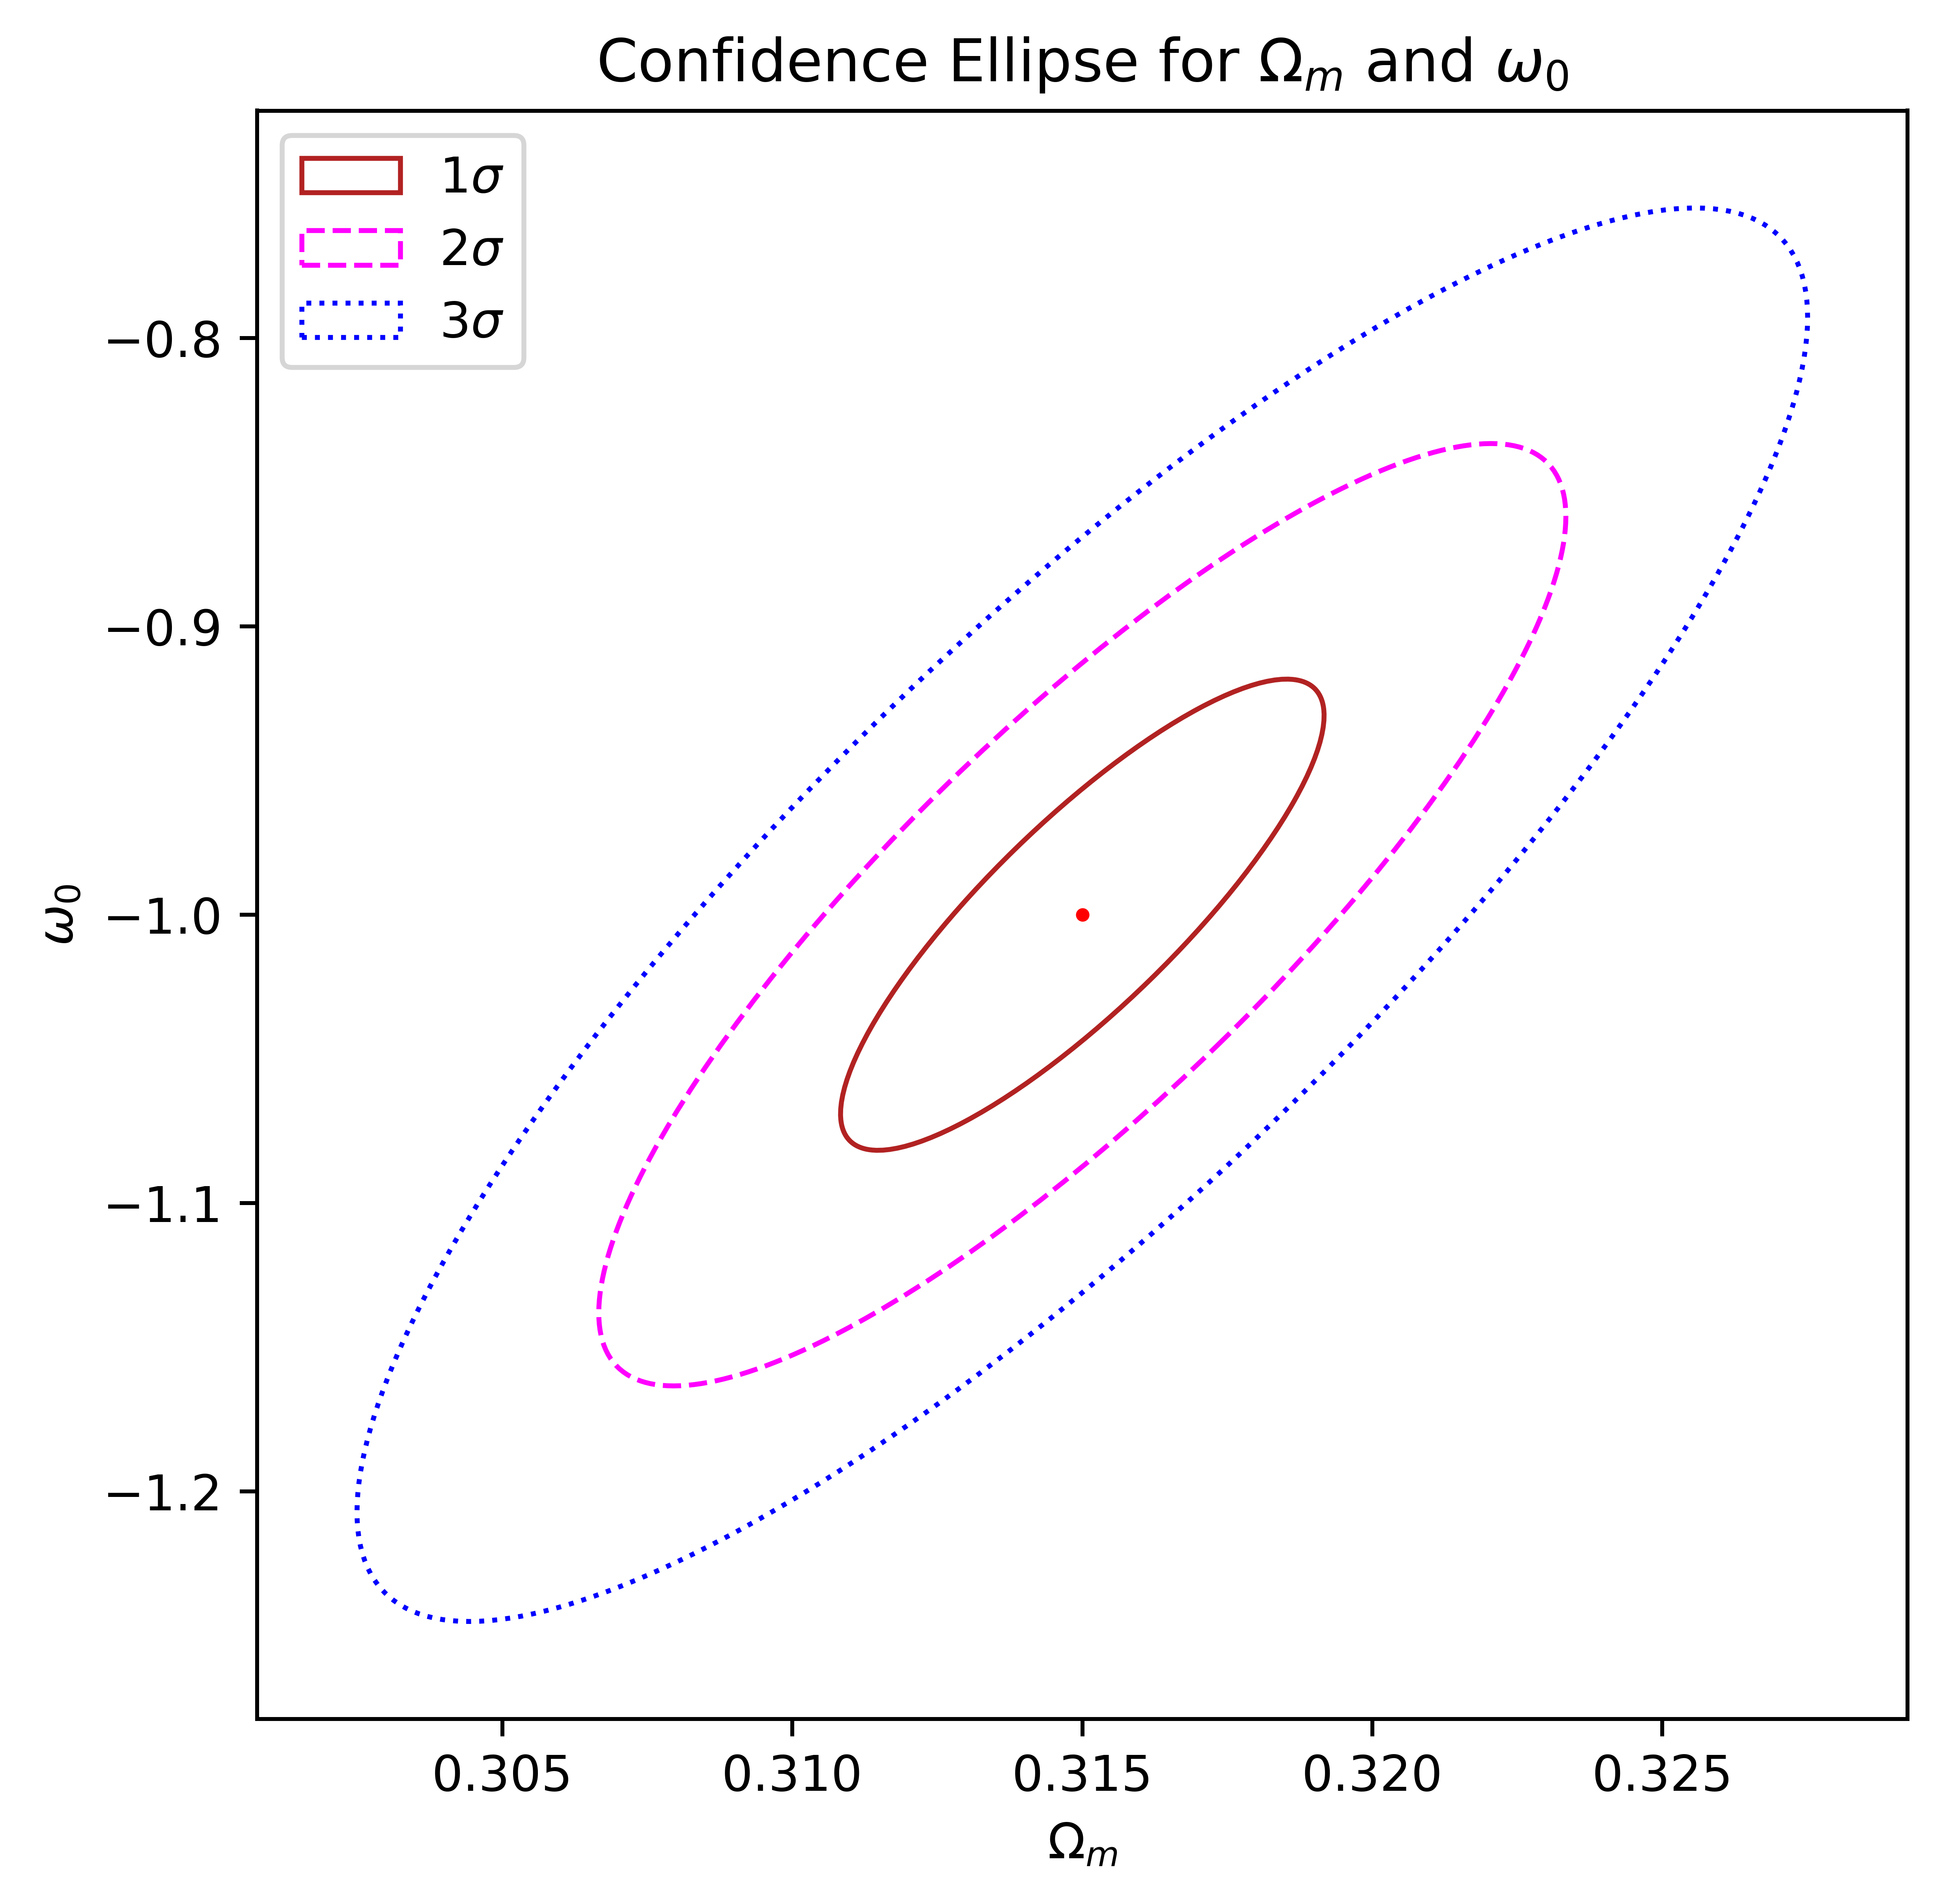

In [51]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))
confidence_ellipse(fisher_n_4_03, Omega_m, w_0, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(fisher_n_4_03, Omega_m, w_0, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(fisher_n_4_03, Omega_m, w_0, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')
ax_nstd.set_title(r'Confidence Ellipse for $\Omega_m$ and $\omega_0$')
ax_nstd.scatter(Omega_m, w_0, c='red', s=3)
ax_nstd.set_xlabel(r'$\Omega_m$')
ax_nstd.set_ylabel(r'$\omega_0$')
ax_nstd.legend(loc='upper left')
plt.show()

In [44]:
ixgrid=np.ix_([3, 4], [3, 4])

In [45]:
ixgrid

(array([[3],
        [4]]),
 array([[3, 4]]))

In [66]:
matrix = np.linalg.inv(fisher_f["n_4"][ixgrid])

In [67]:
Sxx=matrix[0][0]
Syy=matrix[1][1]
Sxy=matrix[0][1]

In [61]:
eig = np.linalg.eig(np.linalg.inv(fisher_f["n_4"][ixgrid]))

In [62]:
eig

(array([0.00743623, 0.000183  ]),
 array([[ 0.96274156,  0.27042317],
        [-0.27042317,  0.96274156]]))

In [65]:
eig[1][np.argmax(eig[0])]

array([0.96274156, 0.27042317])

In [76]:
a = 1*np.sqrt(0.5*(Sxx + Syy) + np.sqrt(Sxy**2 + 0.25*(Sxx-Syy)**2))
b = 1*np.sqrt(0.5*(Sxx + Syy) - np.sqrt(Sxy**2 + 0.25*(Sxx-Syy)**2))

In [79]:
maxeig = eig[1][np.argmax(eig[0])]
theta = np.arctan2(maxeig[1],maxeig[0])
fid =(w_0, w_a)
el = Ellipse(fid, 2*a, 2*b, angle=-np.degrees(theta), facecolor='none', label=r'$1\sigma$', edgecolor='firebrick')

In [82]:
print("w_0 = " + str(fid[0]))

w_0 = -1


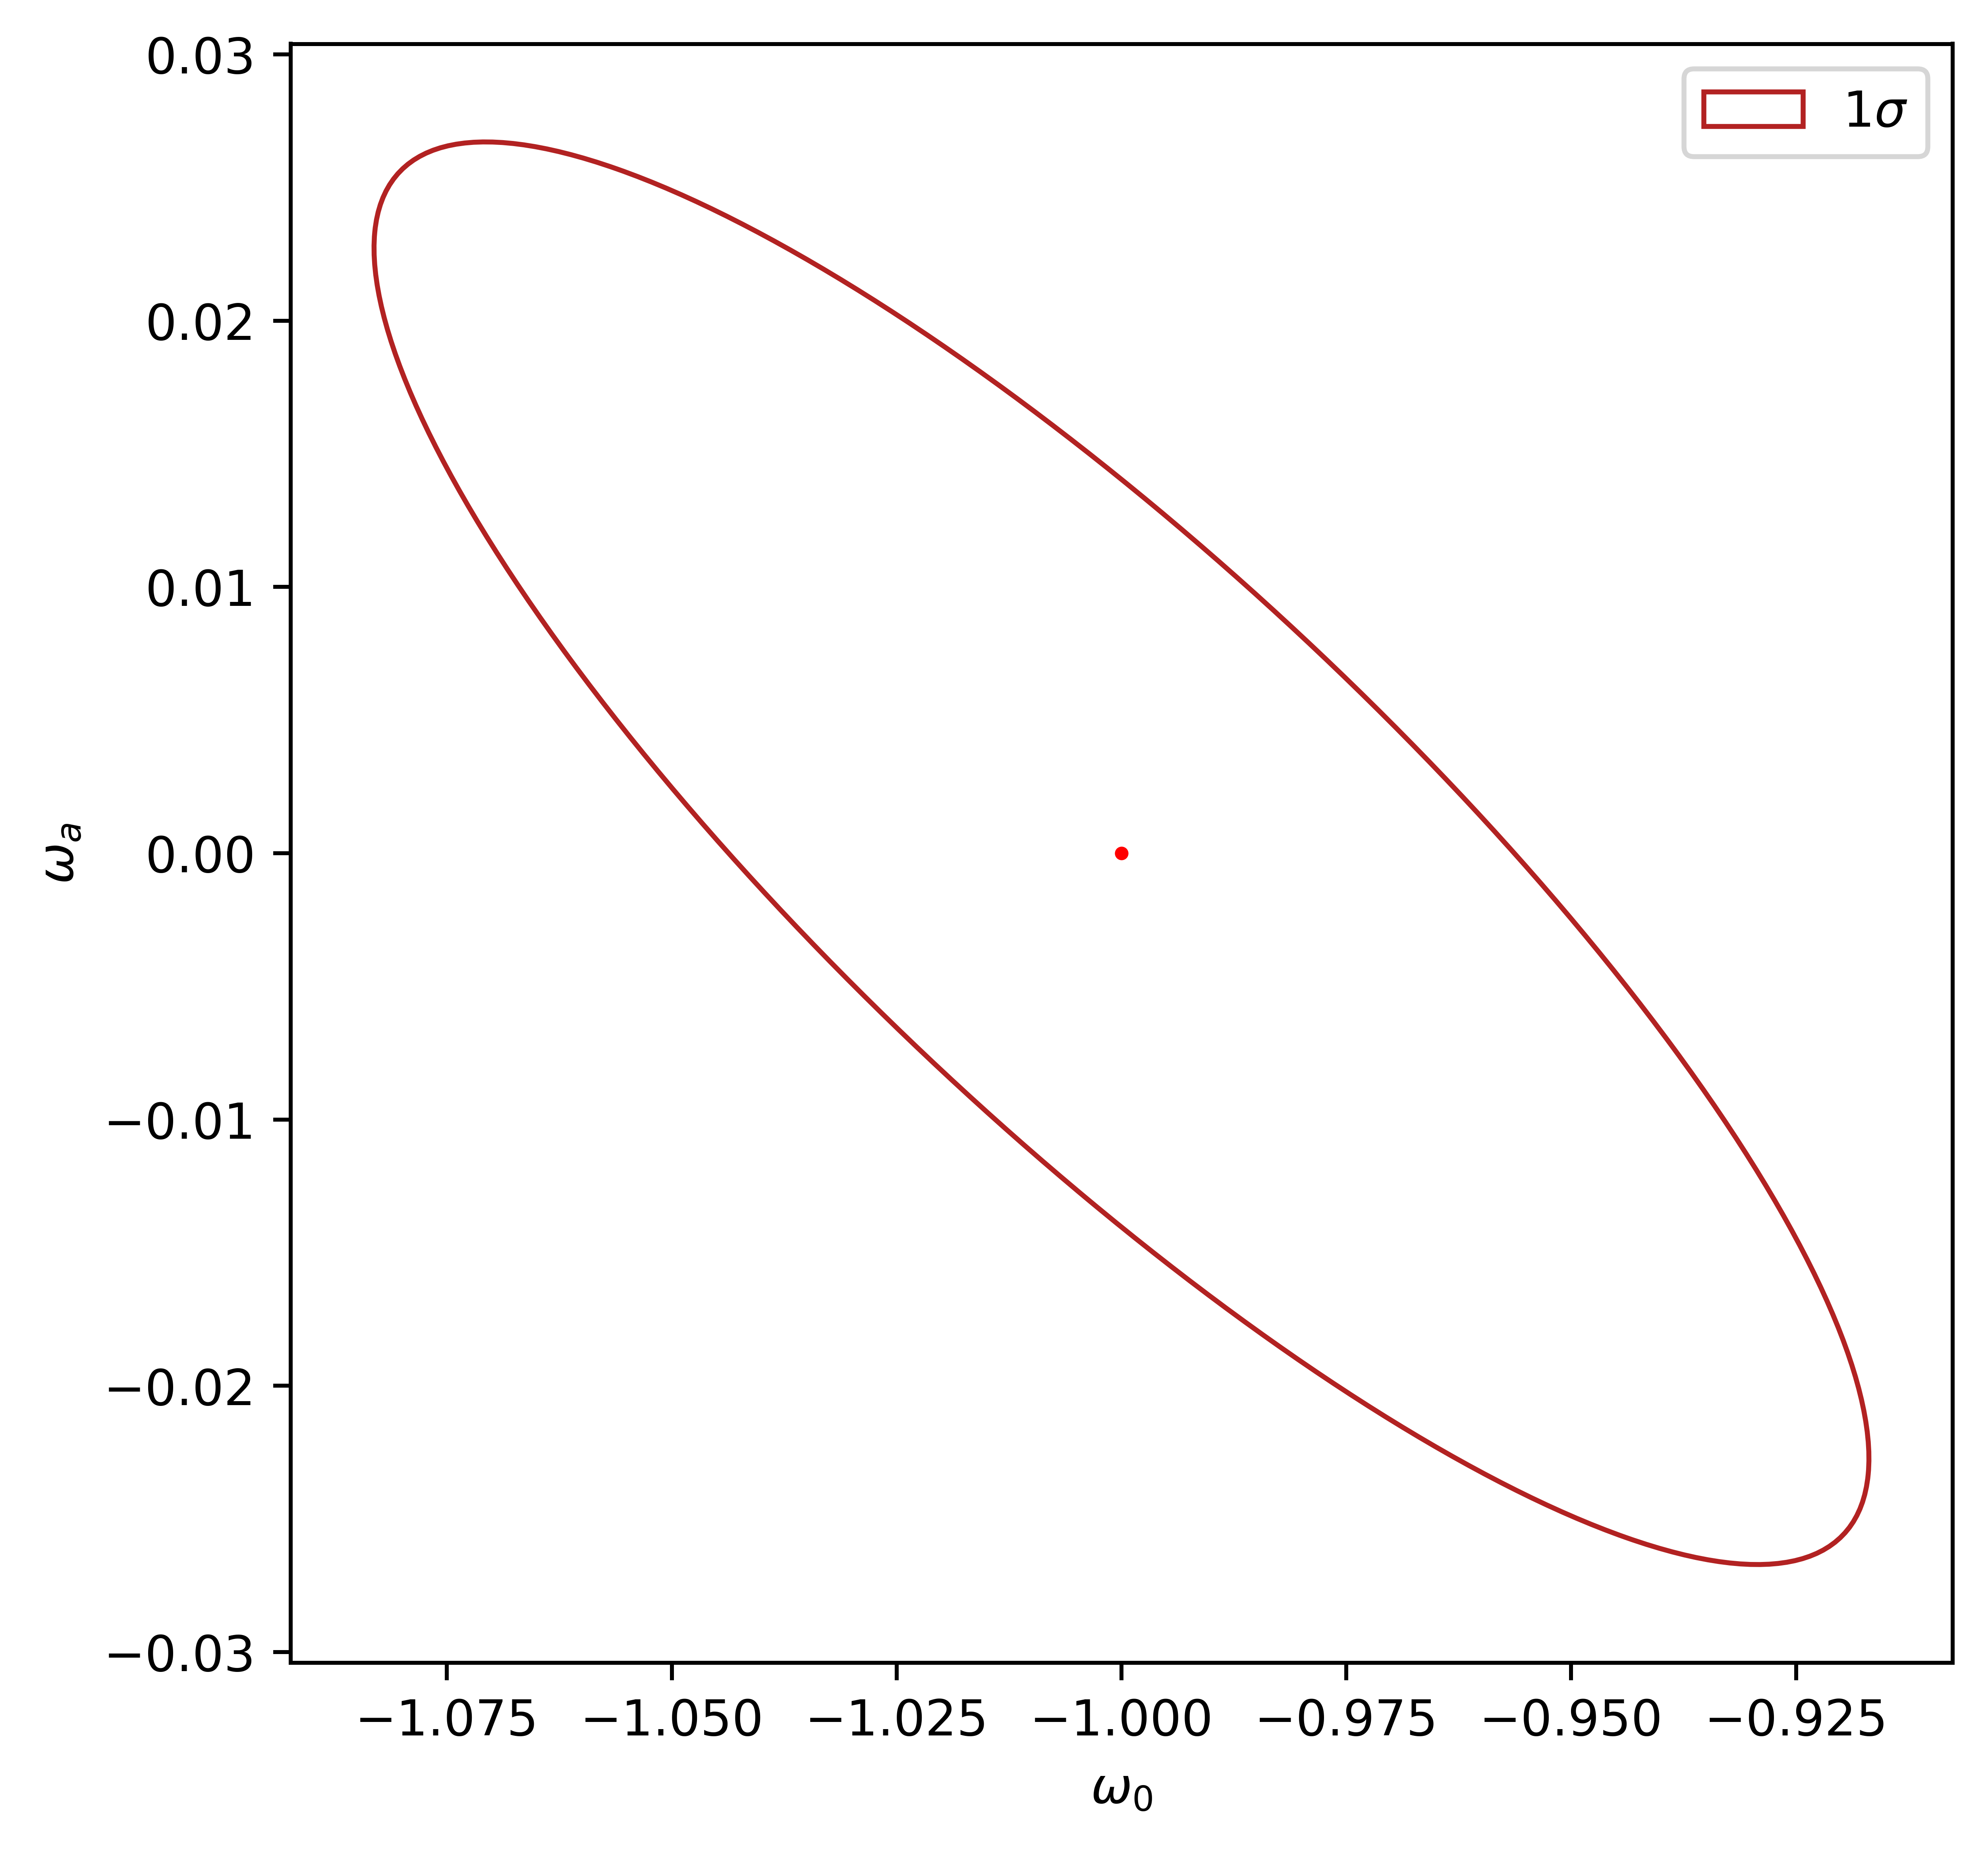

In [80]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))
ax_nstd.add_patch(el)
ax_nstd.scatter( w_0, w_a, c='red', s=3)
ax_nstd.set_xlabel(r'$\omega_0$')
ax_nstd.set_ylabel(r'$\omega_a$')
ax_nstd.legend(loc='upper right')
plt.show()

In [24]:
#try 'w_0' and 'w_a'
fisher_n_4_34 = np.zeros([2,2])
fisher_n_4_34[0,0] = fisher_f["n_4"][3,3]
fisher_n_4_34[0,1] = fisher_f["n_4"][3,4]
fisher_n_4_34[1,0] = fisher_f["n_4"][4,3]
fisher_n_4_34[1,1] = fisher_f["n_4"][4,4]
np.linalg.inv(fisher_n_4_34)

array([[ 0.00690581, -0.00188836],
       [-0.00188836,  0.00071342]])

In [25]:
corr_p(fisher_n_4_34)

array([[ 1.        , -0.85075884],
       [-0.85075884,  1.        ]])

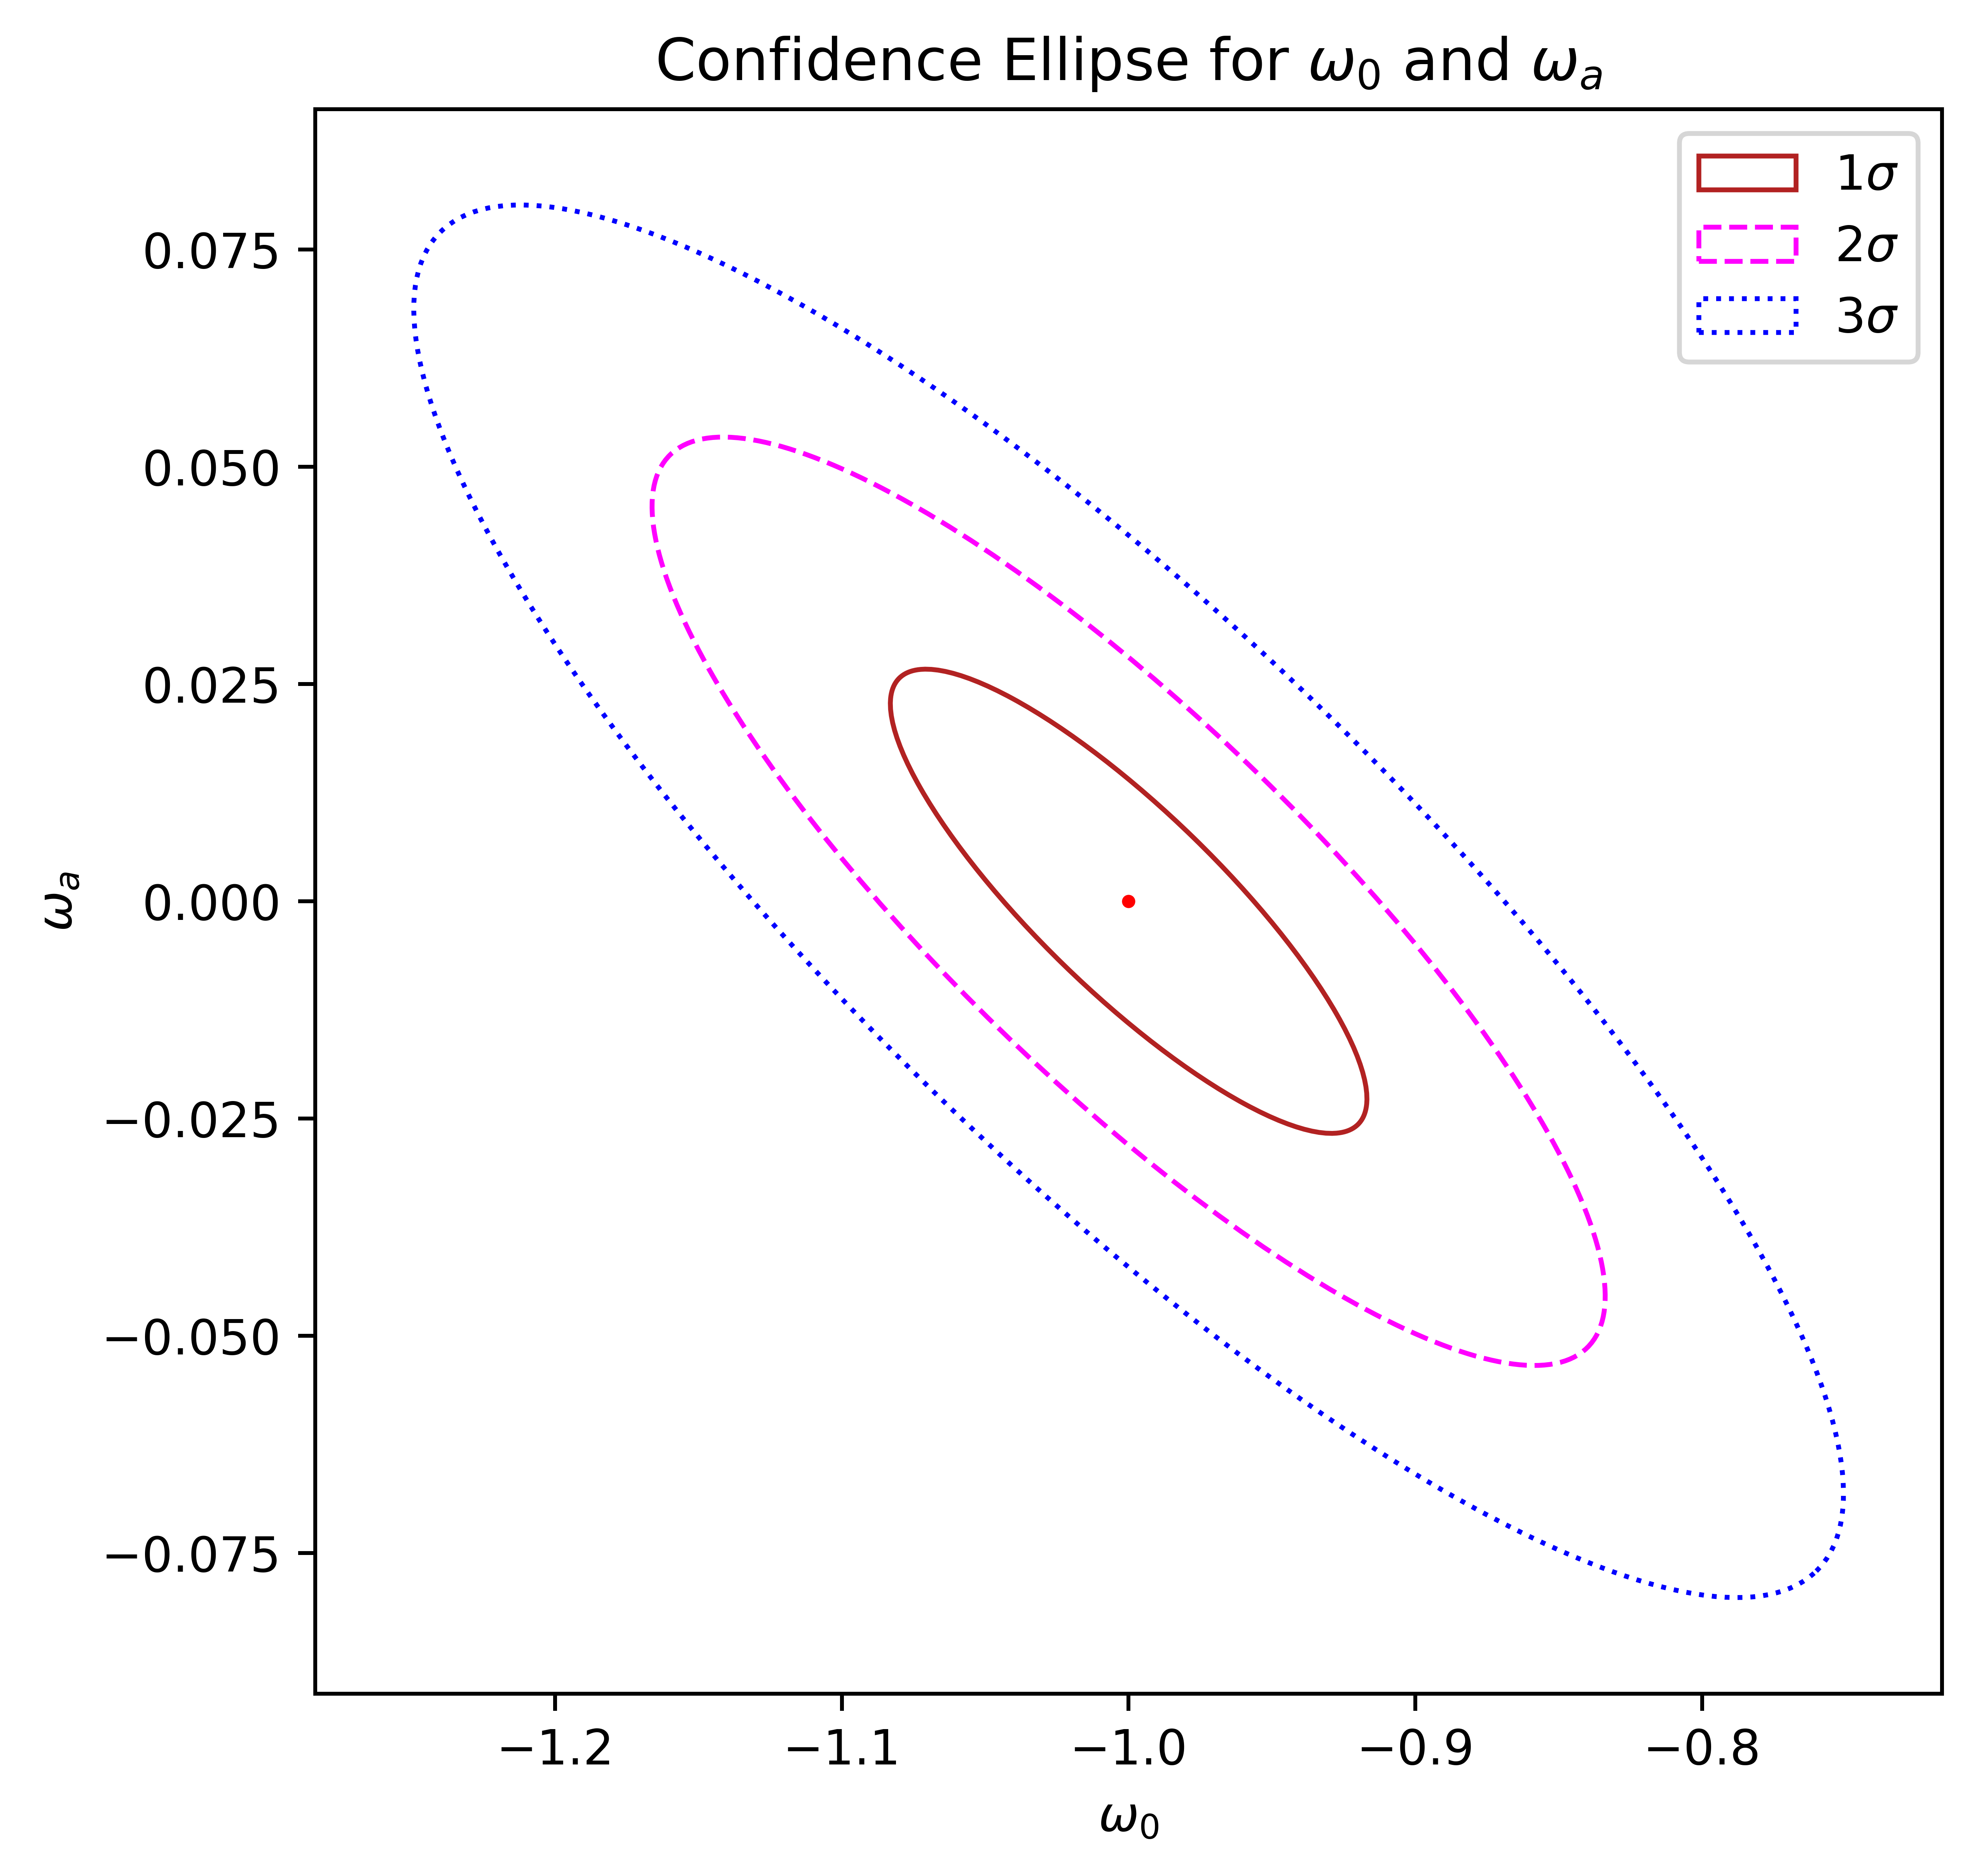

In [26]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))
confidence_ellipse(fisher_n_4_34, w_0, w_a, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(fisher_n_4_34, w_0, w_a, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(fisher_n_4_34, w_0, w_a, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')
ax_nstd.set_title(r'Confidence Ellipse for $\omega_0$ and $\omega_a$')
ax_nstd.scatter( w_0, w_a, c='red', s=3)
ax_nstd.set_xlabel(r'$\omega_0$')
ax_nstd.set_ylabel(r'$\omega_a$')
ax_nstd.legend(loc='upper right')
plt.show()

In [27]:
#try 'Omega_m' and 'Omega_b'
fisher_n_4_05 = np.zeros([2,2])
fisher_n_4_05[0,0] = fisher_f["n_4"][0,0]
fisher_n_4_05[0,1] = fisher_f["n_4"][0,5]
fisher_n_4_05[1,0] = fisher_f["n_4"][5,0]
fisher_n_4_05[1,1] = fisher_f["n_4"][5,5]
corr_p(fisher_n_4_05)

array([[1.        , 0.36277427],
       [0.36277427, 1.        ]])

In [55]:
para_a="Omega_m"
para_b="Omega_b"

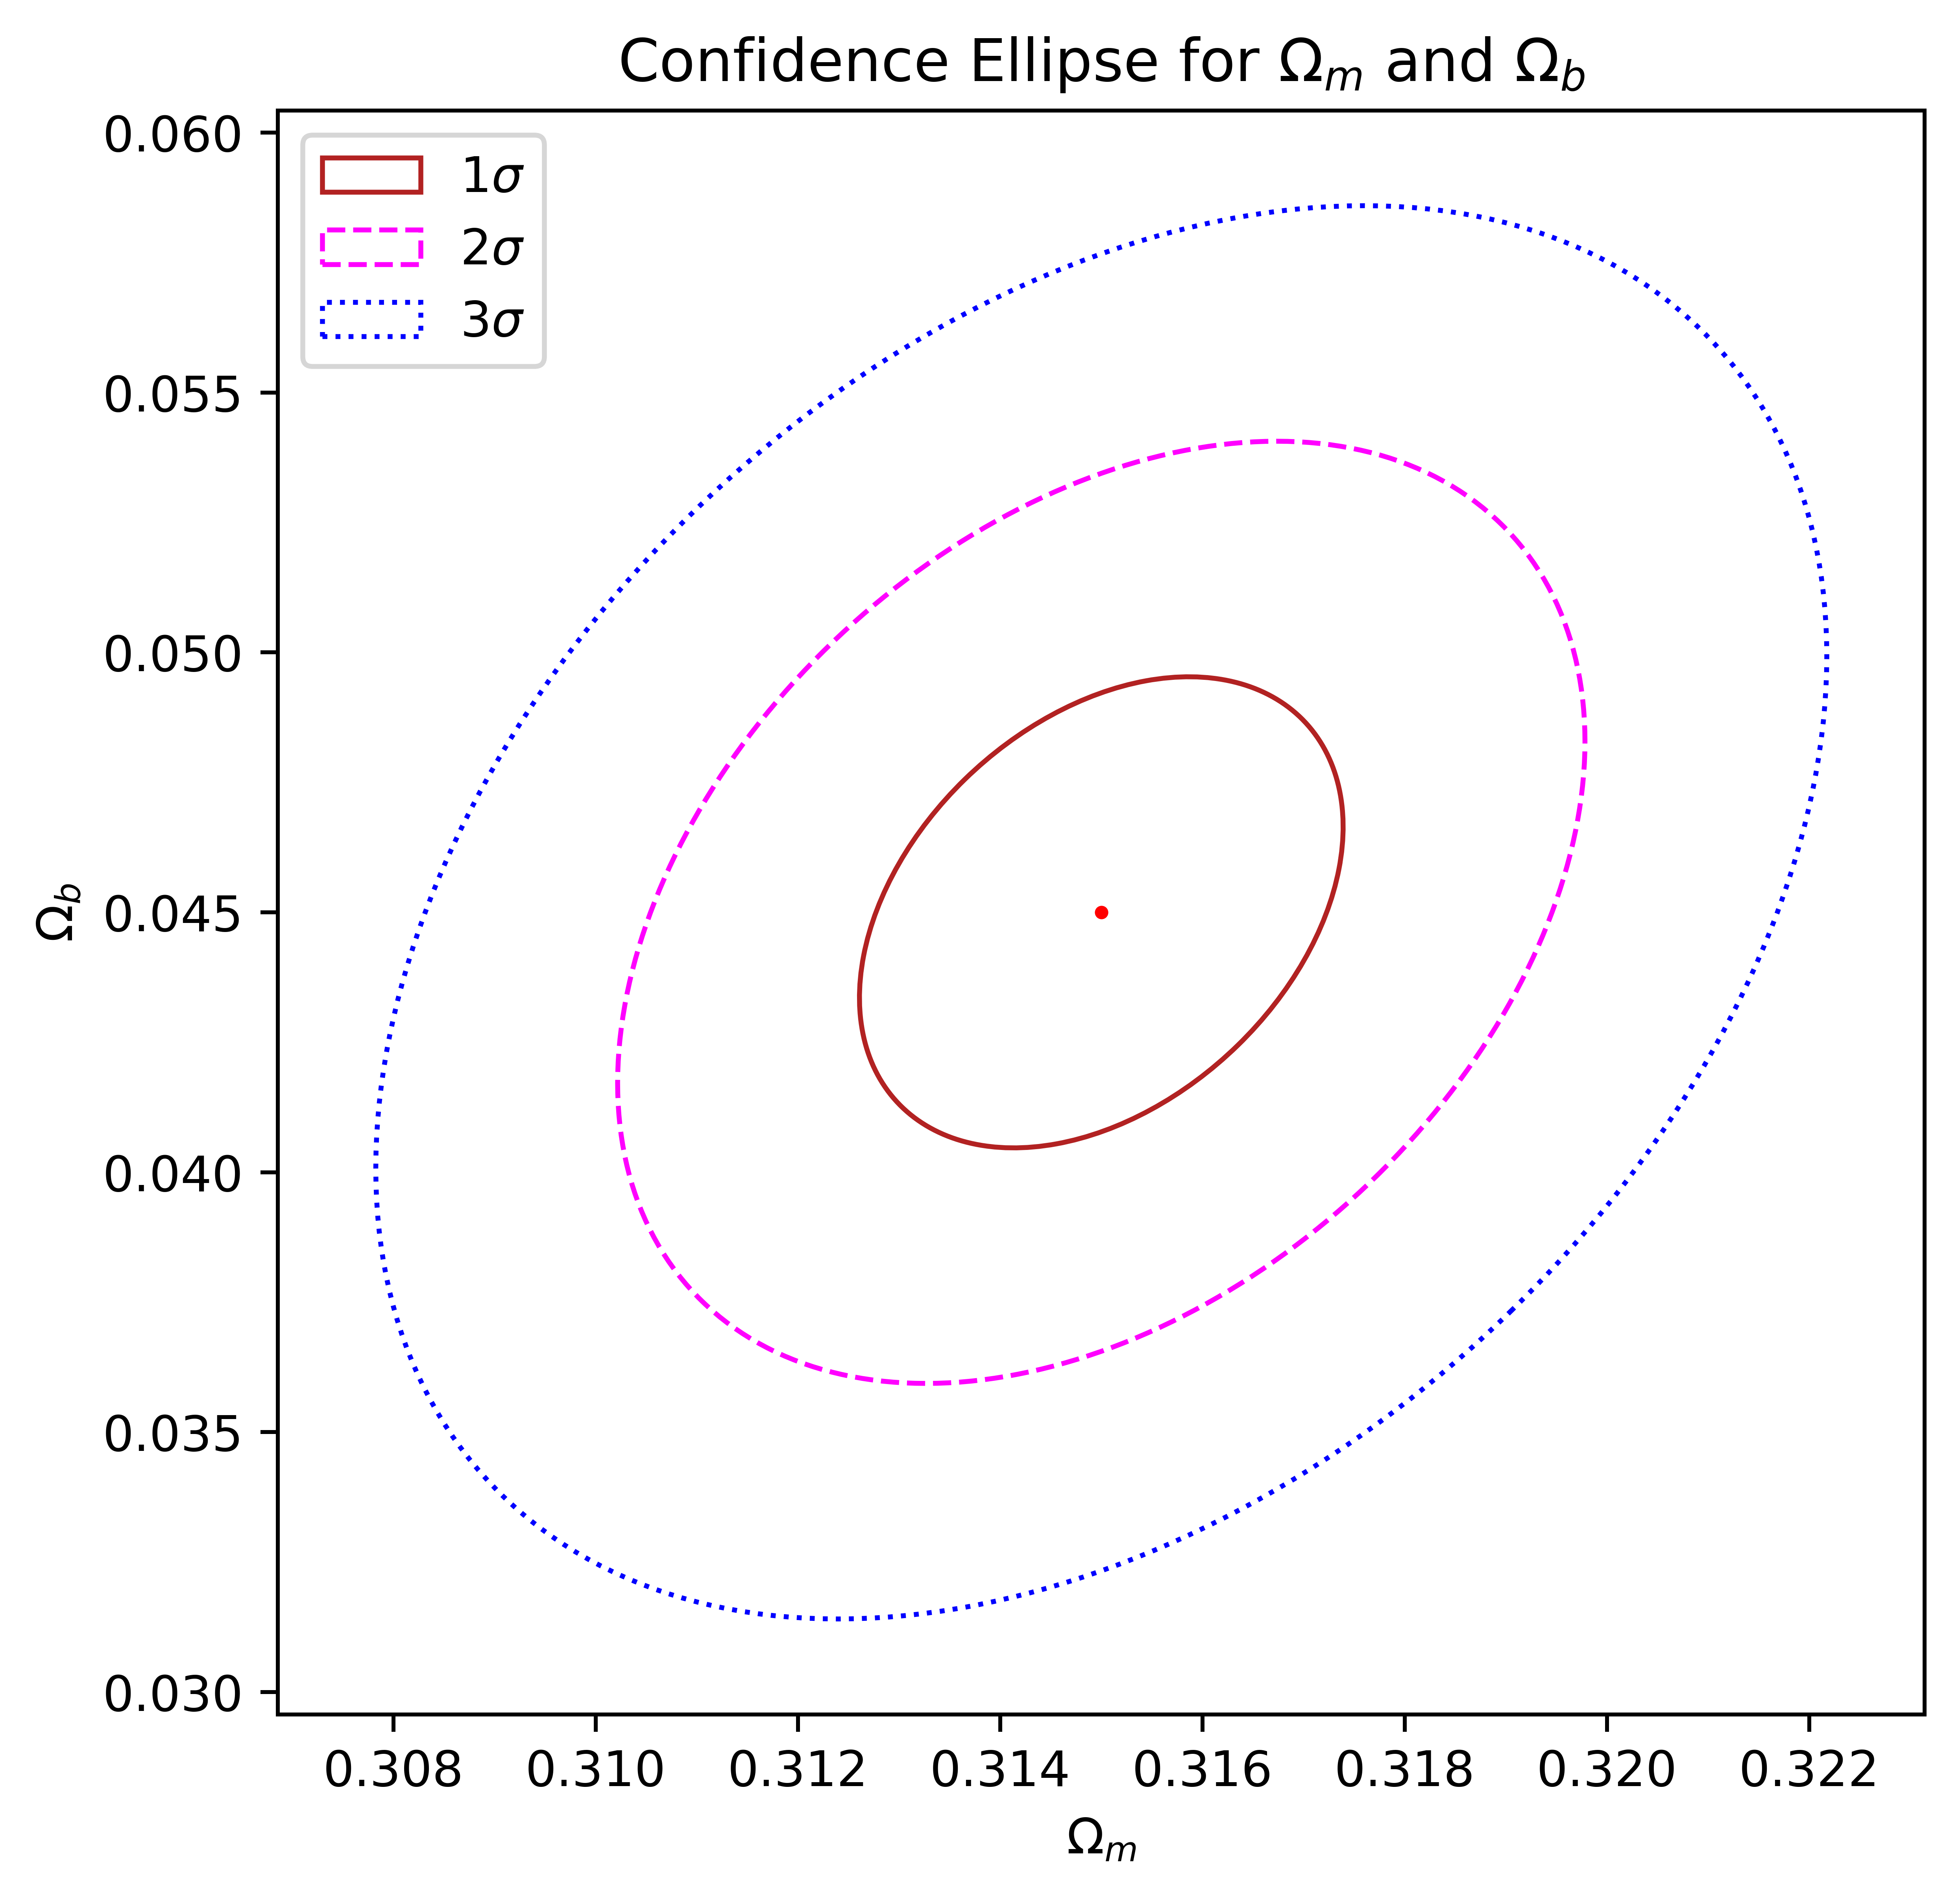

In [60]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))
confidence_ellipse(fisher_n_4_05, Omega_m, Omega_b, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(fisher_n_4_05, Omega_m, Omega_b, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(fisher_n_4_05, Omega_m, Omega_b, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')
ax_nstd.set_title(r'Confidence Ellipse for $\{0}$ and $\{1}$'.format(para_a, para_b))
ax_nstd.scatter(Omega_m, Omega_b, c='red', s=3)
ax_nstd.set_xlabel(r'$\Omega_m$')
ax_nstd.set_ylabel(r'$\Omega_b$')
ax_nstd.legend(loc='upper left')
plt.show()

In [34]:
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$\w_0$', r'$\w_a$', r'$\Omega_b$', r'$h$']
print(param_labels)

['$\\Omega_m$', '$\\sigma_8$', '$n_s$', '$\\w_0$', '$\\w_a$', '$\\Omega_b$', '$h$']


In [40]:
param_order = ['omega_m', 'sigma_8', 'n_s', 'w_0', 'w_a', 'omega_b', 'h']
'h' not in param_order

False

In [52]:
['Omega_m', 'sigma_8', 'n_s', 'w_0', 'w_a', 'Omega_b', 'h'].index("H")

ValueError: 'H' is not in list